<a href="https://colab.research.google.com/github/njiririkinyanjui/Unsupervised_Learning_In_R/blob/main/Part_2__R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Question

* You are a Data analyst at Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax).
* Performing  Feature selection in the marketing dataset and later providing recommendations based on your insights.

* Loading the Data
* EDA 
* Feature Selection

# Loading the libraries and Dataset

## Loading the Libraries

In [1]:
# Importing the libraries

library(tidyverse)

install.packages("reshape",dependencies = TRUE) # Boxplot for outliers
library(reshape)

install.packages("psych") # helps with the describe function in EDA
library(psych)

install.packages("ggplot2")
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’



Attaching package: ‘reshape’


The following object is masked from ‘package:dplyr’:

    rename


The following objects are masked from ‘package:tidyr’:

    expand, smiths


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘mnormt’



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is uns

## Data loading

In [2]:
# Loading the data

p1 <- read.csv("/content/Supermarket_Dataset_1 - Sales Data.csv")

# Reading the sstructure of the dataset
str(p1)

# Reading the first 6 rows of the datasets::
head(p1)

# Our dataset has 1000 unique attributes and 16 rows

'data.frame':	1000 obs. of  16 variables:
 $ Invoice.ID             : chr  "750-67-8428" "226-31-3081" "631-41-3108" "123-19-1176" ...
 $ Branch                 : chr  "A" "C" "A" "A" ...
 $ Customer.type          : chr  "Member" "Normal" "Normal" "Member" ...
 $ Gender                 : chr  "Female" "Female" "Male" "Male" ...
 $ Product.line           : chr  "Health and beauty" "Electronic accessories" "Home and lifestyle" "Health and beauty" ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Date                   : chr  "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
 $ Time                   : chr  "13:08" "10:29" "13:23" "20:33" ...
 $ Payment                : chr  "Ewallet" "Cash" "Credit card" "Ewallet" ...
 $ cogs                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross.margin.percentage: num  4.76 4.76 4.76 4.76 4.76 ...
 $ g

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
6,699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


In [3]:
# Understanding the shape of the dataset and attaching the row names to the runtime

dim(p1)

attach(p1)

[1] 1000   16

In [4]:
# Checking the number of unique values in each column

lengths(lapply(p1, unique))

Invoice.ID                  Branch           Customer.type 
                   1000                       3                       2 
                 Gender            Product.line              Unit.price 
                      2                       6                     943 
               Quantity                     Tax                    Date 
                     10                     990                      89 
                   Time                 Payment                    cogs 
                    506                       3                     990 
gross.margin.percentage            gross.income                  Rating 
                      1                     990                      61 
                  Total 
                    990

* The Invoice Id has 1000 unique attributes / rows
* Their are three types of branches A, B and C
* Theirs only Male and Female in the gender column
* Quality Ranges from 1-10
* There are three modes of payments; Ewallet, Cash and Credit Card

## Data Cleaning

In [5]:
# Checking for missing values

colSums(is.na(p1))

# Our dataset has no missing attributes

Invoice.ID                  Branch           Customer.type 
                      0                       0                       0 
                 Gender            Product.line              Unit.price 
                      0                       0                       0 
               Quantity                     Tax                    Date 
                      0                       0                       0 
                   Time                 Payment                    cogs 
                      0                       0                       0 
gross.margin.percentage            gross.income                  Rating 
                      0                       0                       0 
                  Total 
                      0

In [6]:
# Checking for duplicates

any(duplicated(p1))

# No duplicates observed in our dataset

[1] FALSE

In [7]:
# Creating a variable with only numeric attributes

p1_num <- p1[ , unlist(lapply(p1, is.numeric))]

# Previewing the dataset
head(p1_num)

,Unit.price,Quantity,Tax,cogs,gross.margin.percentage,gross.income,Rating,Total
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,74.69,7,26.1415,522.83,4.761905,26.1415,9.1,548.9715
2,15.28,5,3.8200,76.40,4.761905,3.8200,9.6,80.2200
3,46.33,7,16.2155,324.31,4.761905,16.2155,7.4,340.5255
4,58.22,8,23.2880,465.76,4.761905,23.2880,8.4,489.0480
5,86.31,7,30.2085,604.17,4.761905,30.2085,5.3,634.3785
6,85.39,7,29.8865,597.73,4.761905,29.8865,4.1,627.6165


Using  as id variables



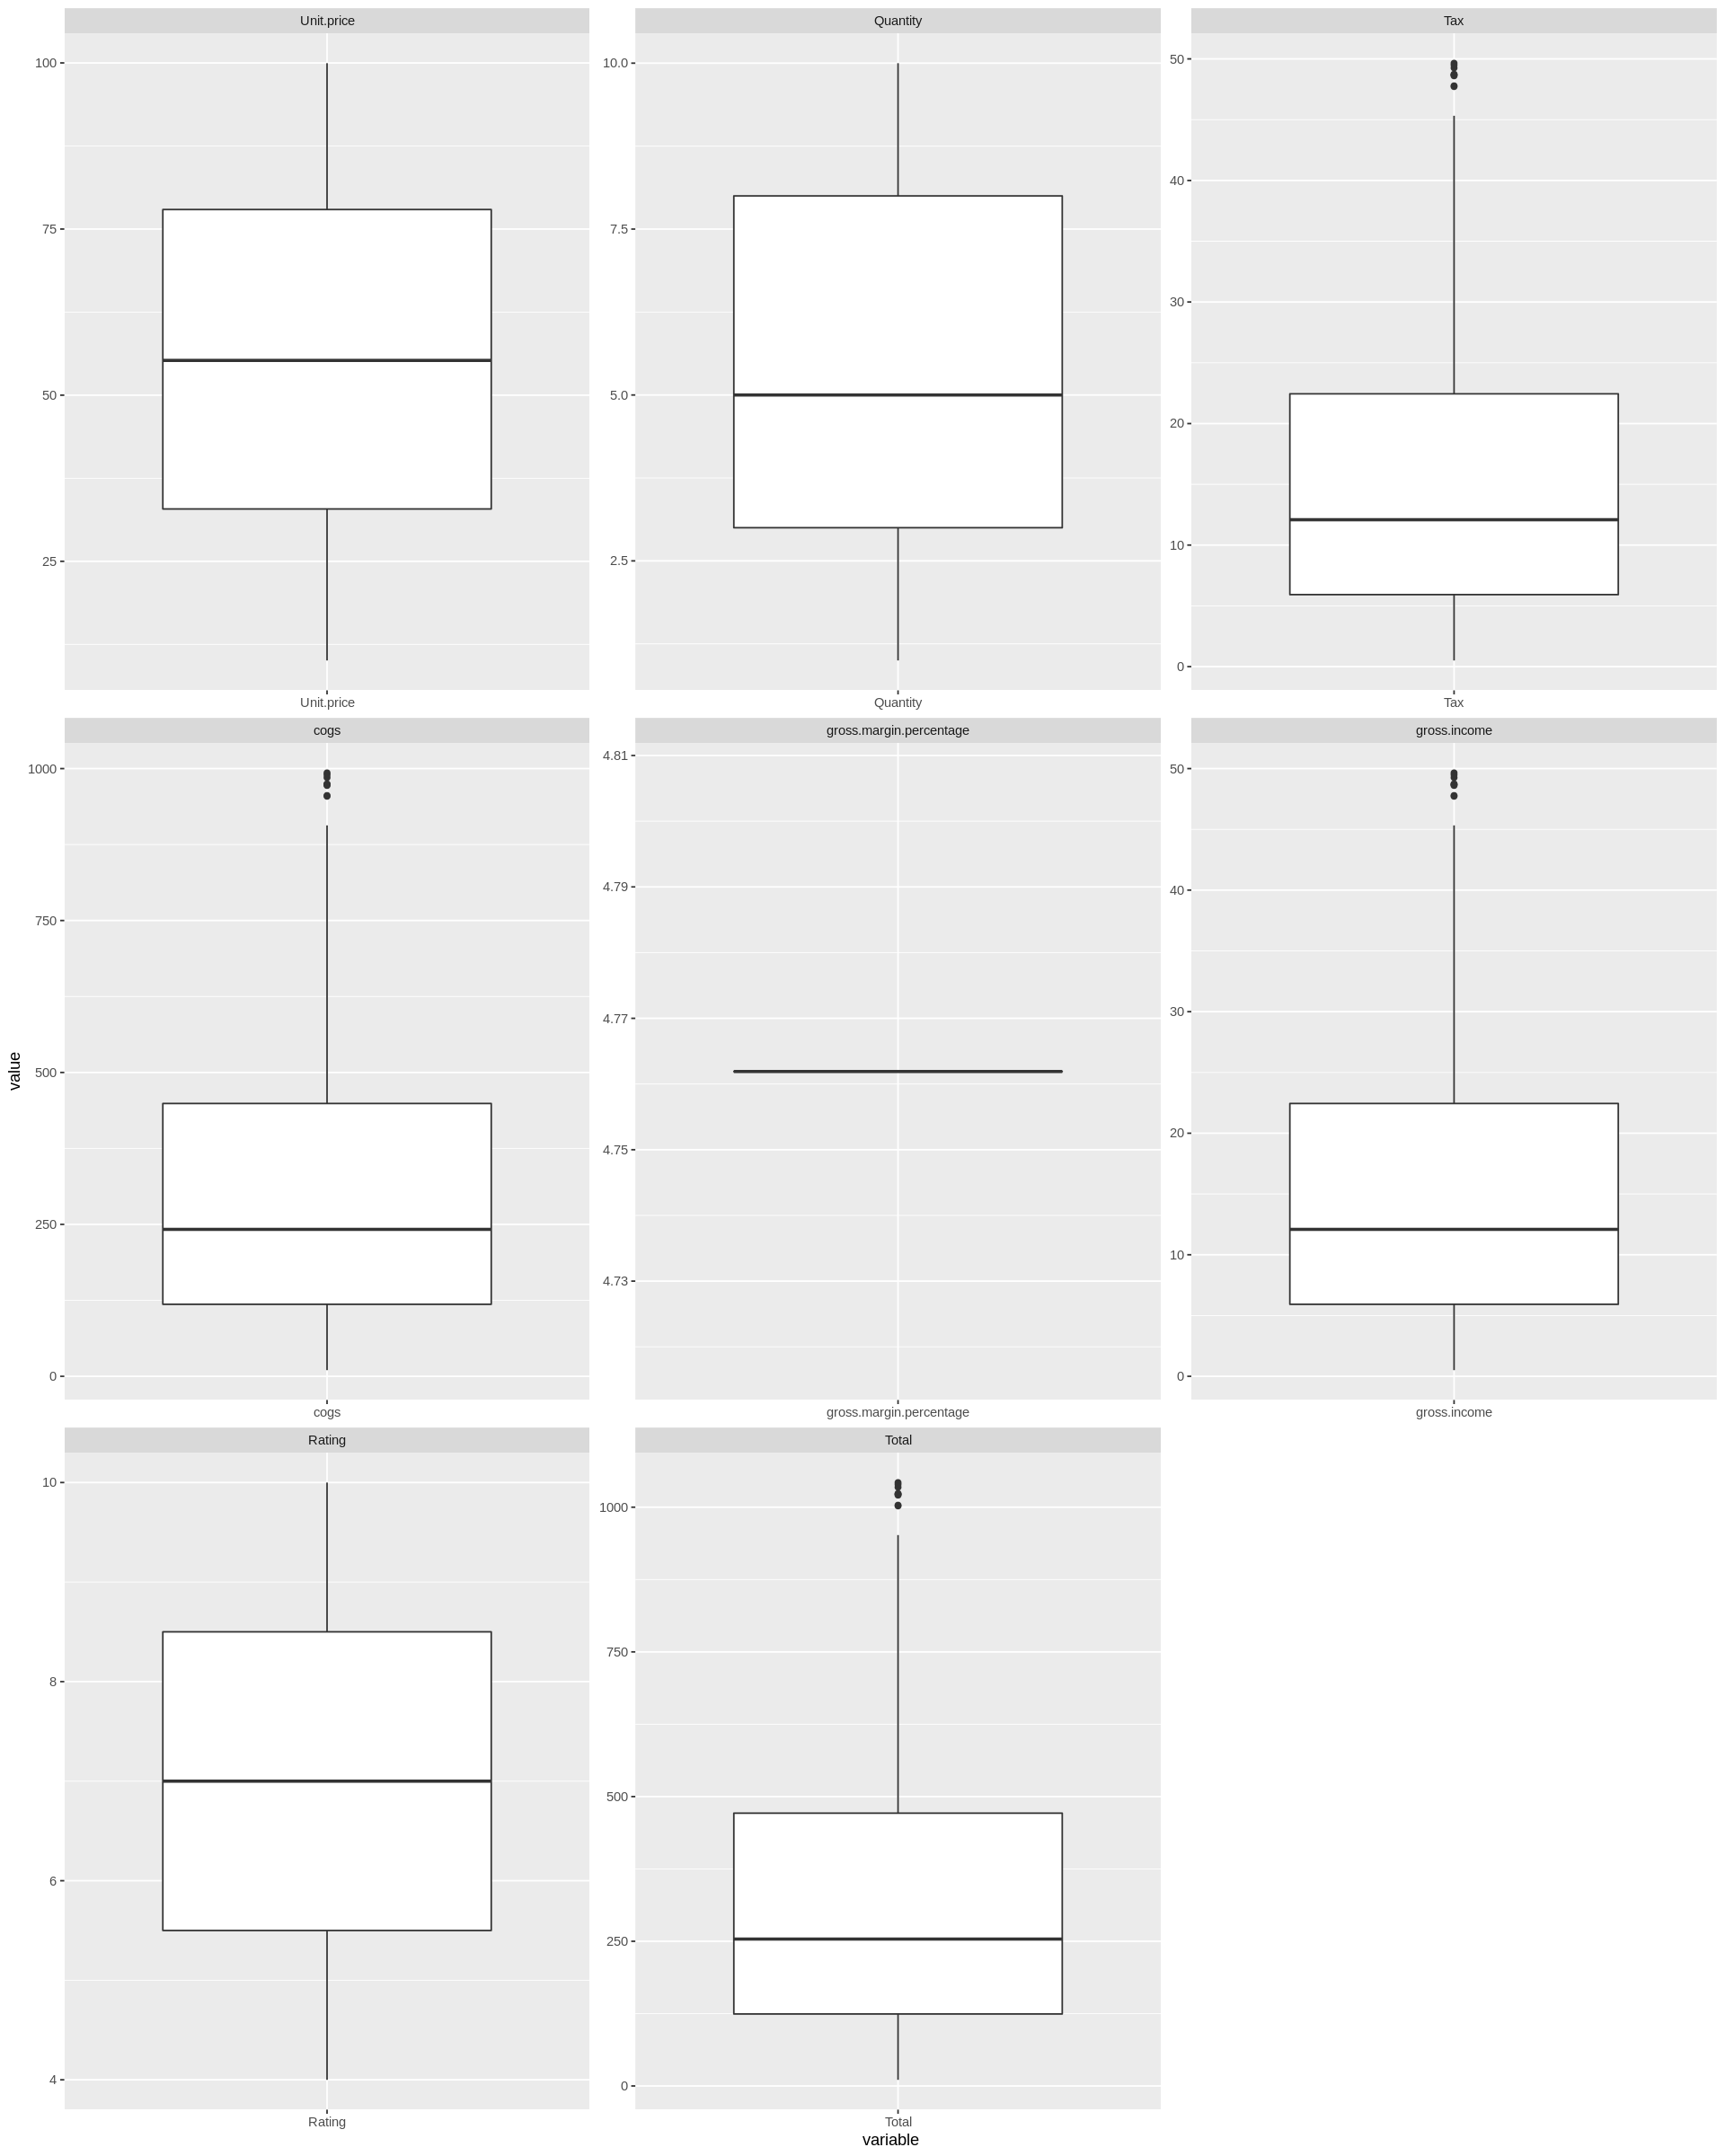

In [8]:
# Plotting boxplots to check for outliers

options(repr.plot.width = 16, repr.plot.height = 20)
ggplot(melt(p1_num), aes(variable, value))+ geom_boxplot() + facet_wrap(~variable, scale="free")

# Few outliers were noticed on Tax, cogs, gross income and total rows

# EDA

* Dealing with the numeric variables for the EDA

## Univariate

In [9]:
# Viewing the statistical summary of the dataset
summary(p1_num)

   Unit.price       Quantity          Tax               cogs       
 Min.   :10.08   Min.   : 1.00   Min.   : 0.5085   Min.   : 10.17  
 1st Qu.:32.88   1st Qu.: 3.00   1st Qu.: 5.9249   1st Qu.:118.50  
 Median :55.23   Median : 5.00   Median :12.0880   Median :241.76  
 Mean   :55.67   Mean   : 5.51   Mean   :15.3794   Mean   :307.59  
 3rd Qu.:77.94   3rd Qu.: 8.00   3rd Qu.:22.4453   3rd Qu.:448.90  
 Max.   :99.96   Max.   :10.00   Max.   :49.6500   Max.   :993.00  
 gross.margin.percentage  gross.income         Rating           Total        
 Min.   :4.762           Min.   : 0.5085   Min.   : 4.000   Min.   :  10.68  
 1st Qu.:4.762           1st Qu.: 5.9249   1st Qu.: 5.500   1st Qu.: 124.42  
 Median :4.762           Median :12.0880   Median : 7.000   Median : 253.85  
 Mean   :4.762           Mean   :15.3794   Mean   : 6.973   Mean   : 322.97  
 3rd Qu.:4.762           3rd Qu.:22.4453   3rd Qu.: 8.500   3rd Qu.: 471.35  
 Max.   :4.762           Max.   :49.6500   Max.   :10.00

In [10]:
# SUmmary statistics of the dataset

summary(p1)

  Invoice.ID           Branch          Customer.type         Gender         
 Length:1000        Length:1000        Length:1000        Length:1000       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 Product.line         Unit.price       Quantity          Tax         
 Length:1000        Min.   :10.08   Min.   : 1.00   Min.   : 0.5085  
 Class :character   1st Qu.:32.88   1st Qu.: 3.00   1st Qu.: 5.9249  
 Mode  :character   Median :55.23   Median : 5.00   Median :12.0880  
                    Mean   :55.67   Mean   : 5.51   Mean   :15.3794  
                    3rd Qu.:77.94   3rd Qu.: 8.00   3rd Qu.:22.4453  
                    Max.   :99.96   Max. 

In [11]:
# This function provides the ones most useful for scale construction and item analysis in classic psychometrics. 
# Range is most useful for the first pass in a data set, to check for coding errors.

describe(p1_num)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Unit.price,1,1000,55.672130,26.494628,55.230000,55.617800,33.36591,10.080000,99.960000,89.8800,0.007056230,-1.22206222,0.83783371
Quantity,2,1000,5.510000,2.923431,5.000000,5.512500,2.96520,1.000000,10.000000,9.0000,0.012902251,-1.21903927,0.09244699
Tax,3,1000,15.379369,11.708825,12.088000,13.995553,11.13247,0.508500,49.650000,49.1415,0.889893881,-0.09329206,0.37026557
cogs,4,1000,307.587380,234.176510,241.760000,279.911063,222.64945,10.170000,993.000000,982.8300,0.889893881,-0.09329206,7.40531145
gross.margin.percentage,5,1000,4.761905,0.000000,4.761905,4.761905,0.00000,4.761905,4.761905,0.0000,NaN,NaN,0.00000000
gross.income,6,1000,15.379369,11.708825,12.088000,13.995553,11.13247,0.508500,49.650000,49.1415,0.889893881,-0.09329206,0.37026557
Rating,7,1000,6.972700,1.718580,7.000000,6.973125,2.22390,4.000000,10.000000,6.0000,0.008982638,-1.15552546,0.05434628
Total,8,1000,322.966749,245.885335,253.848000,293.906616,233.78193,10.678500,1042.650000,1031.9715,0.889893881,-0.09329206,7.77557702


ERROR: ignored

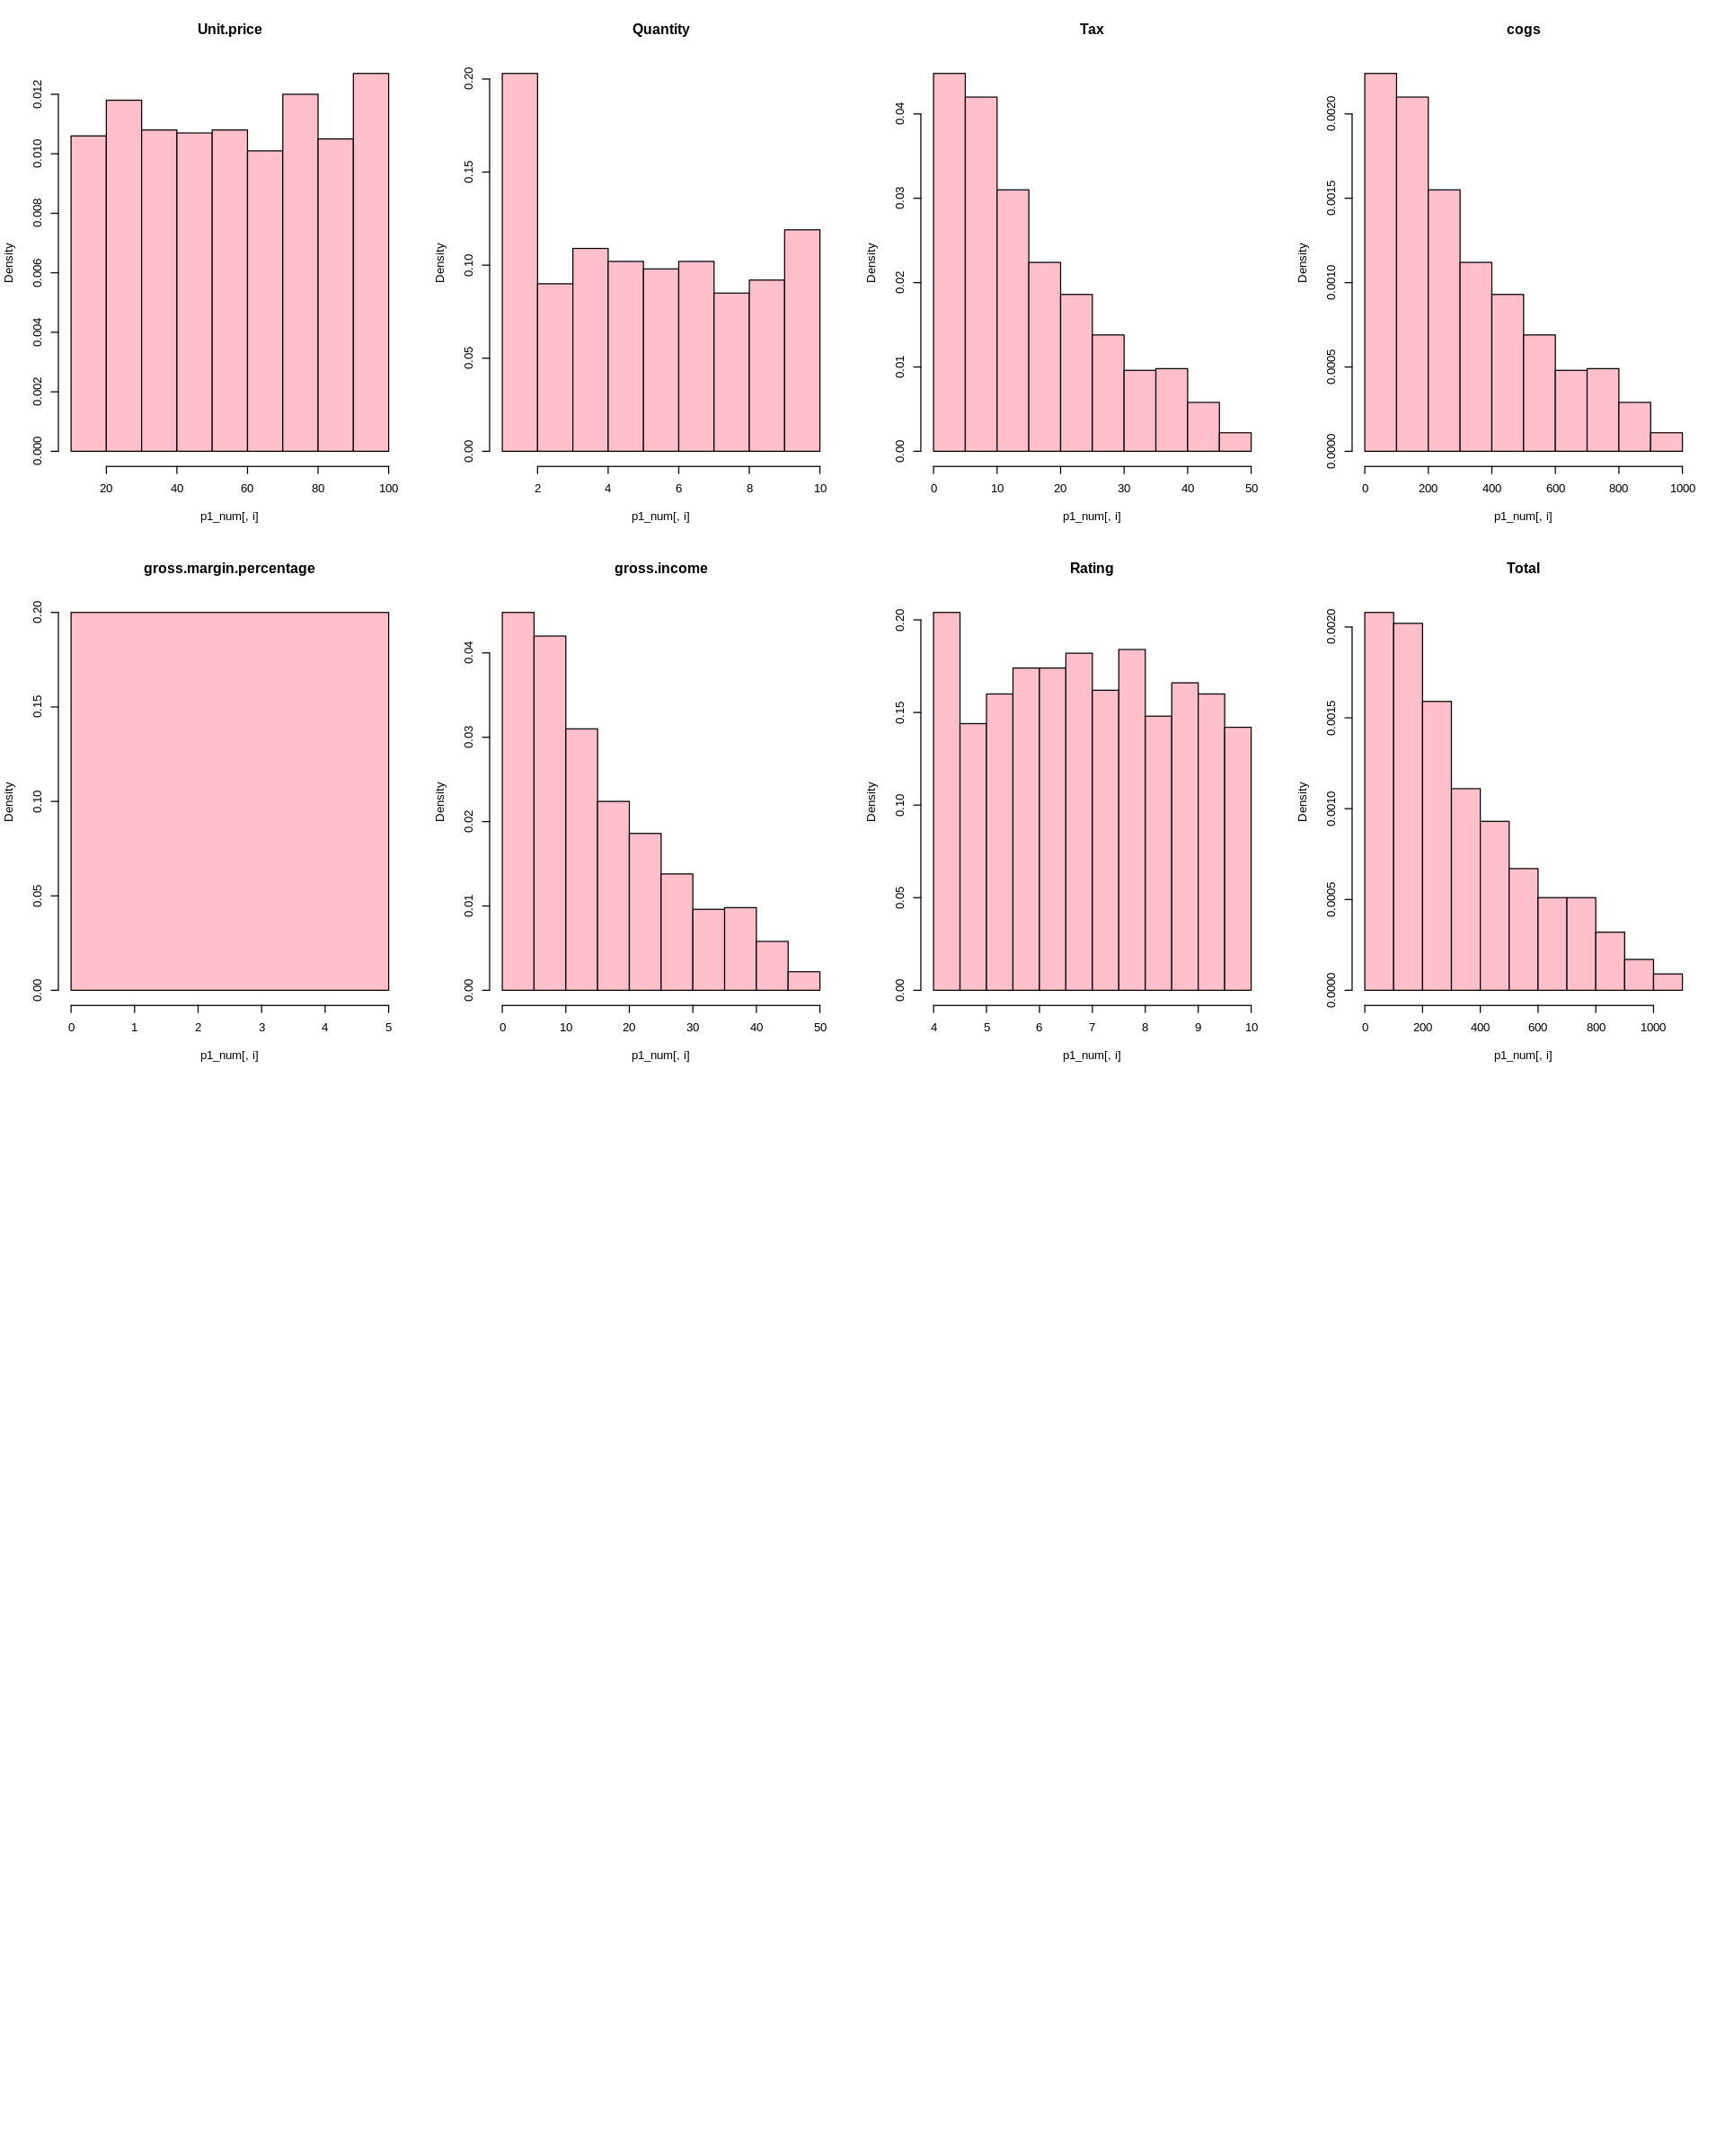

In [12]:
# Plotting histograms to check distributions of numeric attributes

par(mfrow=c(4,4))
colnames <- dimnames(p1_num)[[2]]
for (i in 1:15) {
    hist(p1_num[,i], main=colnames[i], probability=TRUE, col="pink", border="black")
}

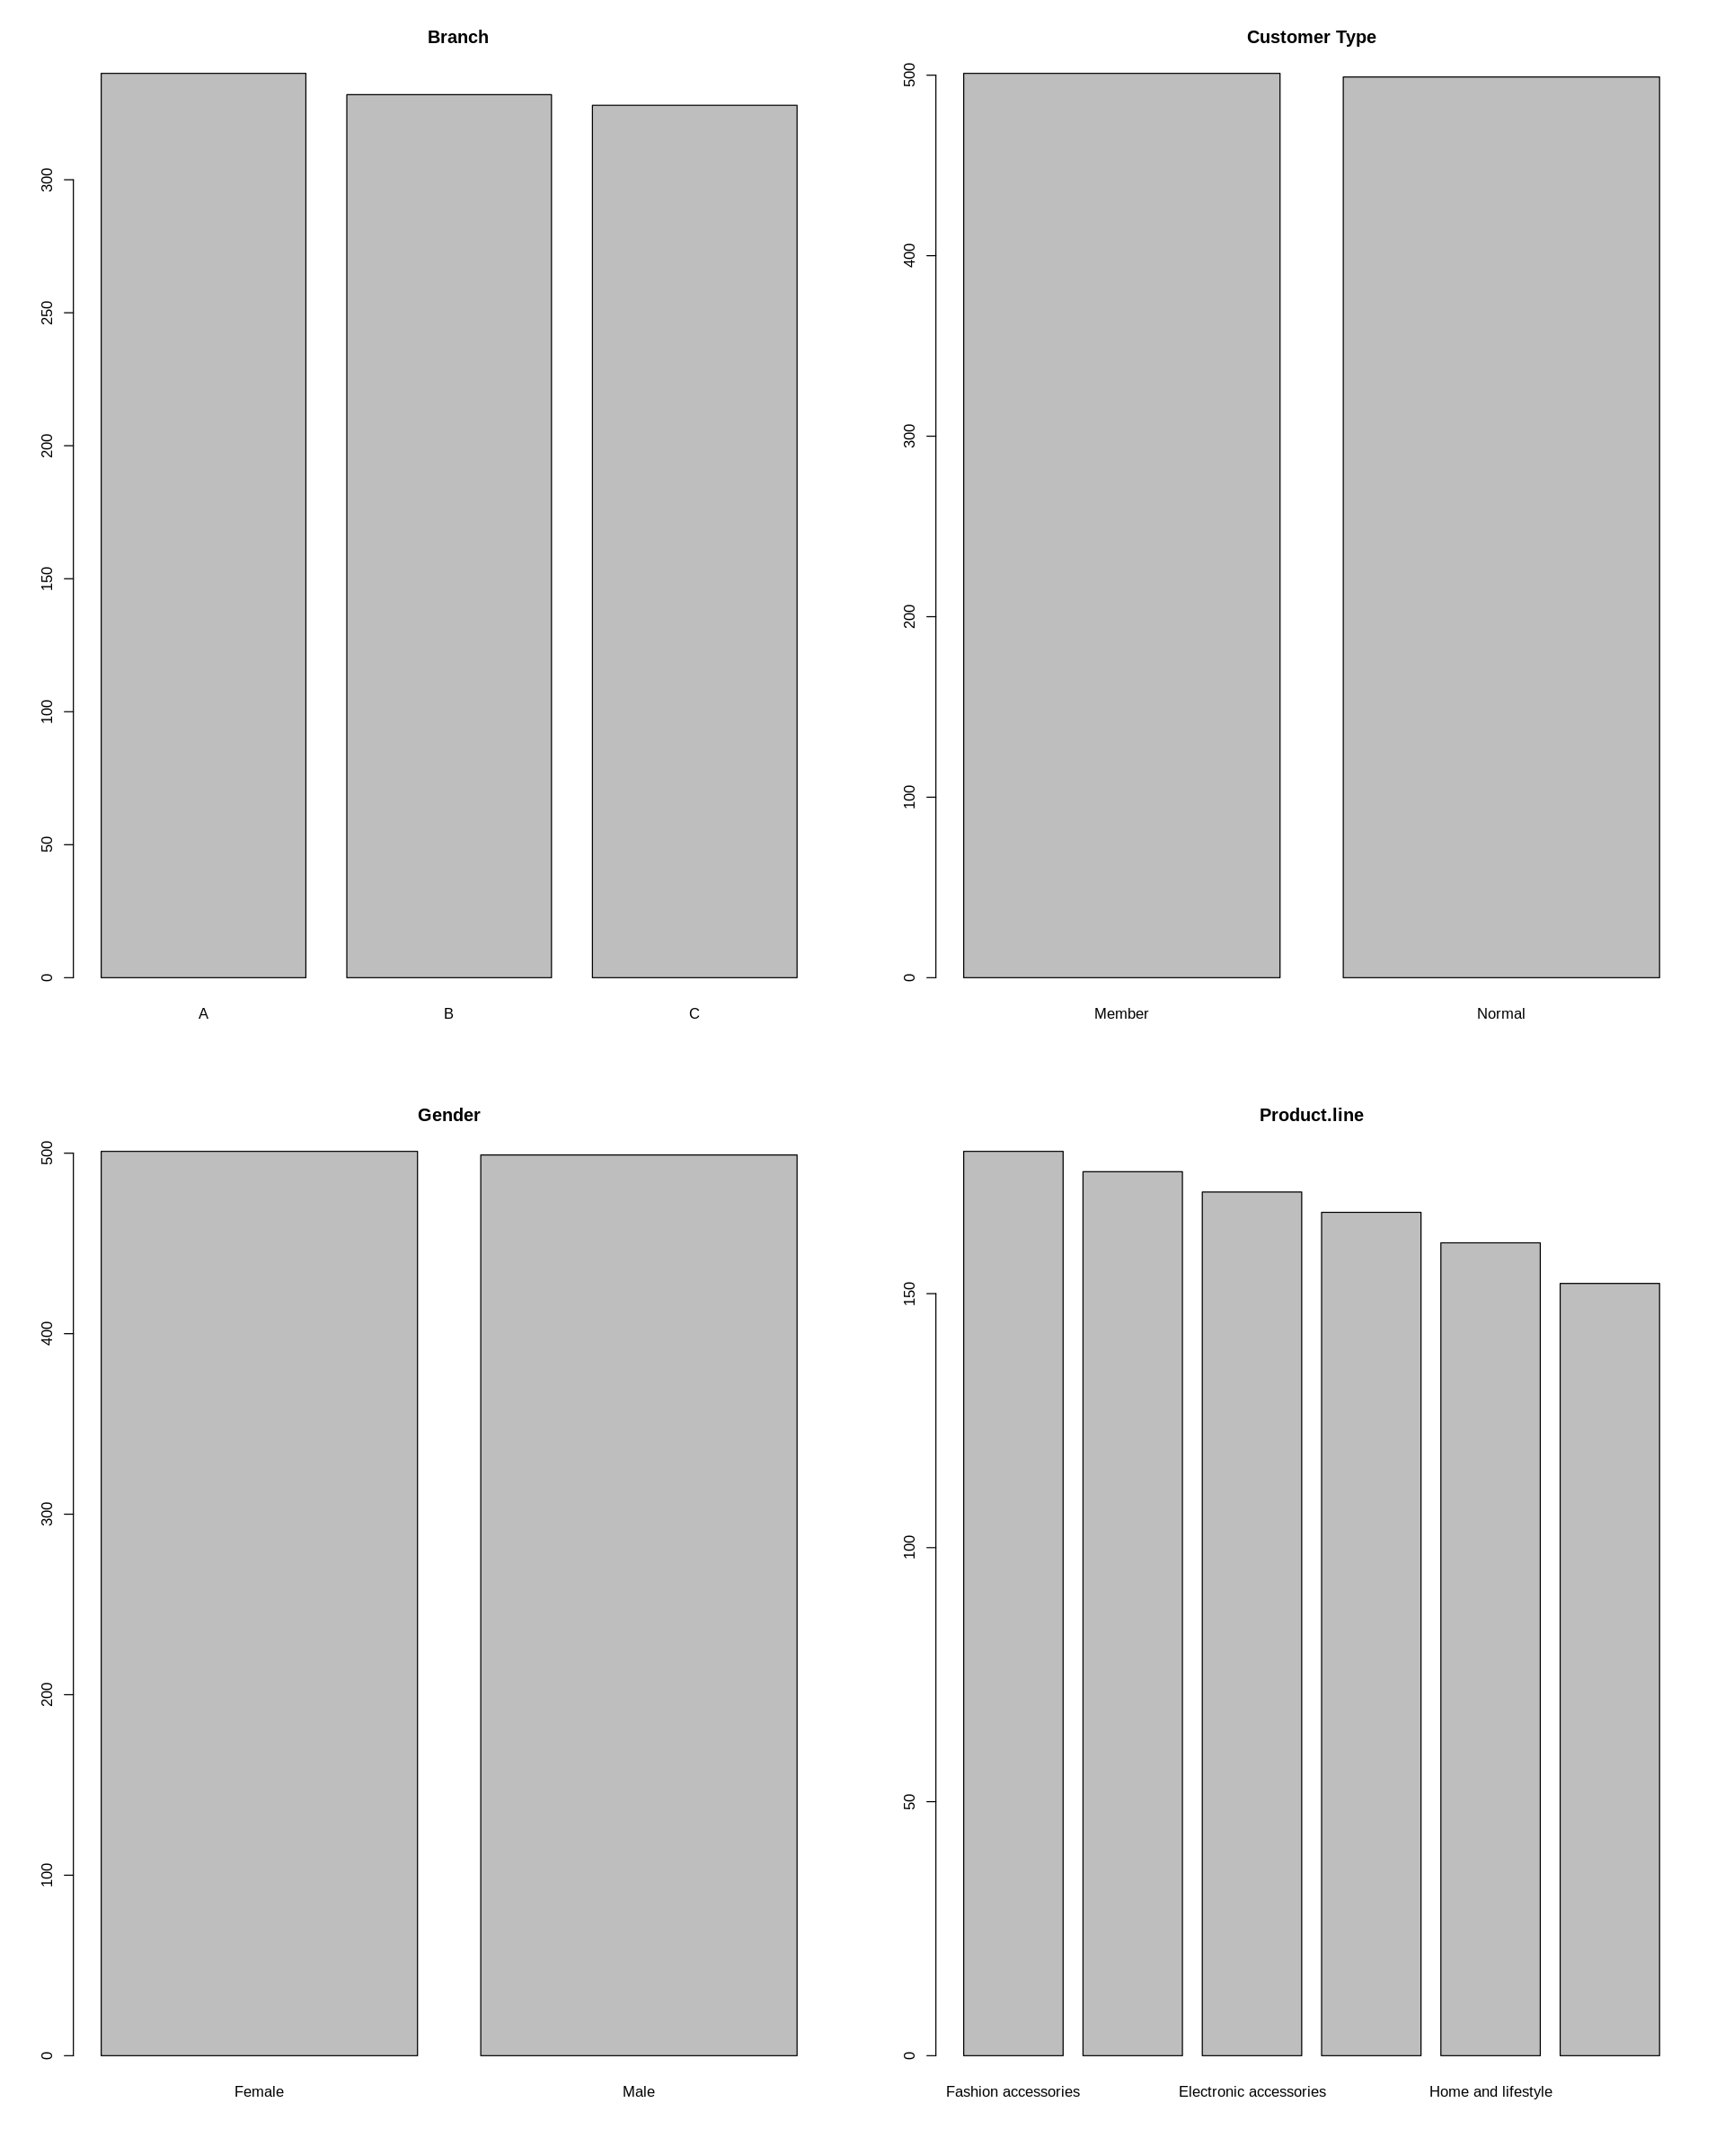

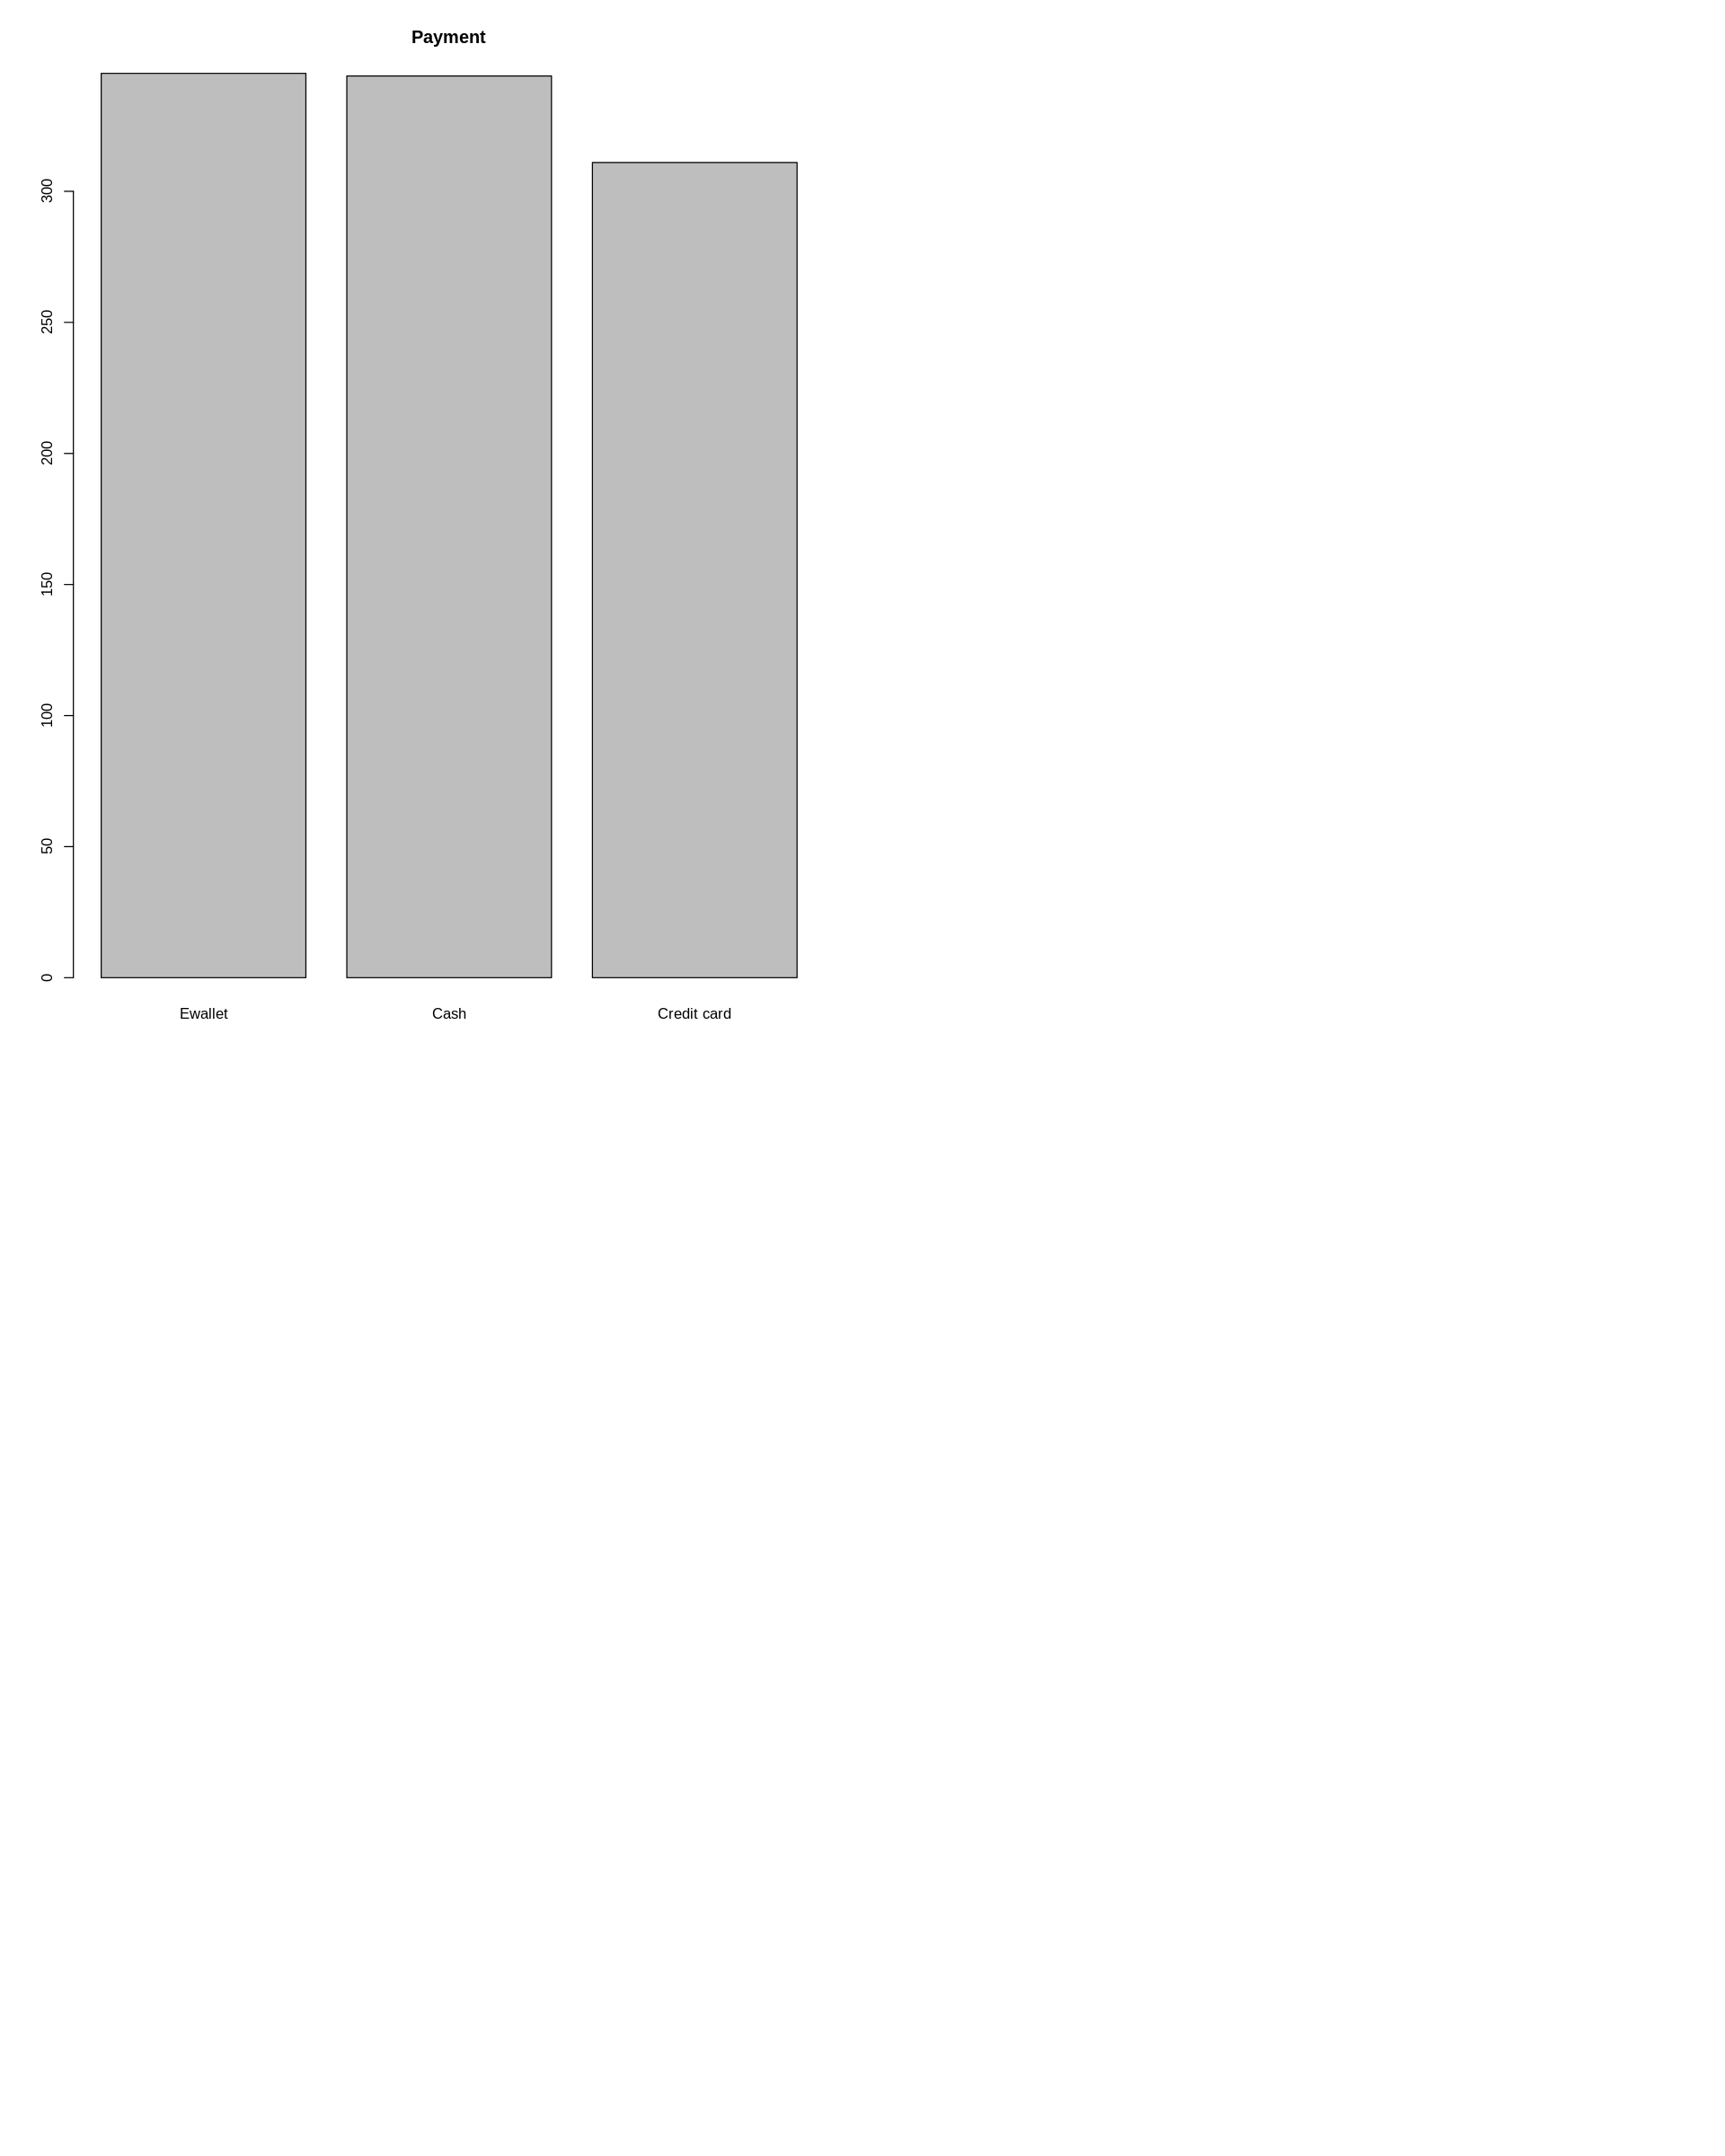

In [13]:
# Bar plot of categorical attributes

par(mfrow=c(2,2))
colnames <- dimnames(p1)[[2]]
barplot(sort(table(p1$Branch), decreasing=T),main='	Branch	')
barplot(sort(table(p1$Customer.type), decreasing=T), main = 'Customer Type')
barplot(sort(table(p1$Gender), decreasing=T), main = 'Gender')
barplot(sort(table(p1$Product.line), decreasing=T), main = 'Product.line')
barplot(sort(table(p1$Payment), decreasing=T), main = 'Payment')

* Branch A has the largest count followed by B then C
* The customer type as an equal count between  the Member and Normal customer
* The male and female have an equal count in the Gender column
* For the payment Ewallet and cash have an equal count then crdit card with at least 300

## Bivariate

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.84 loaded

Warning message in cor(p1_num):
“the standard deviation is zero”


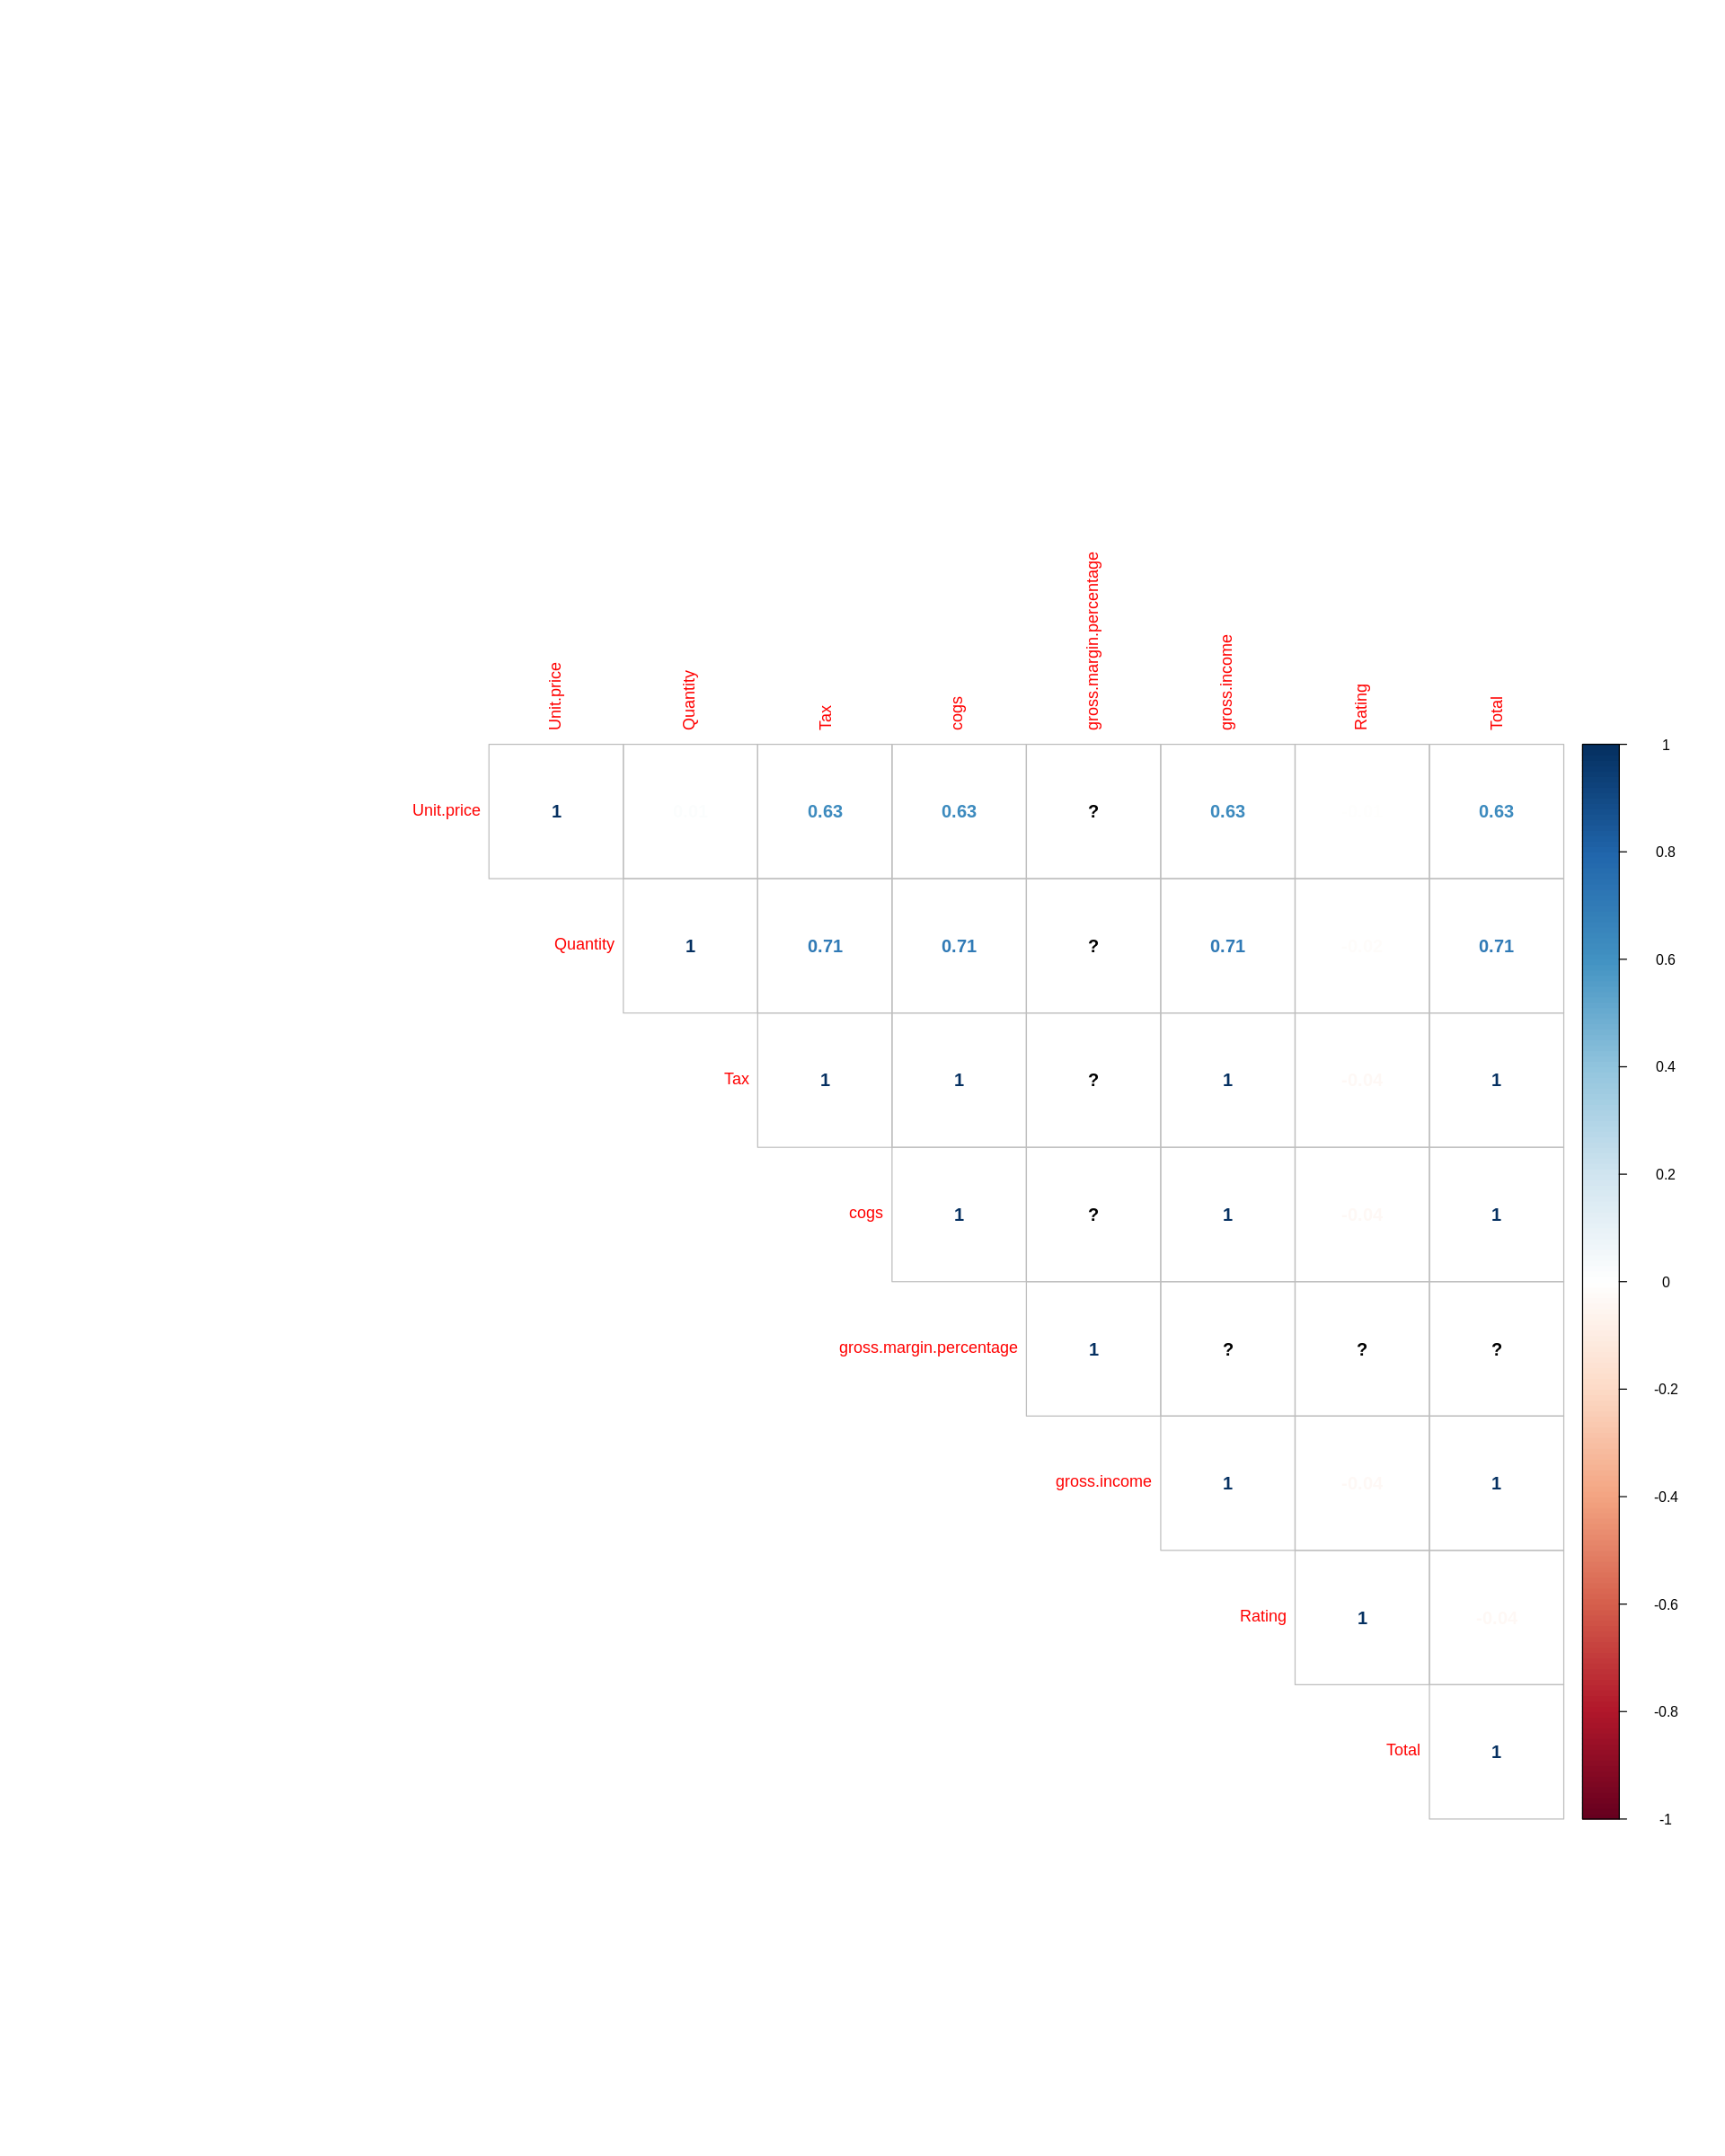

In [14]:
# improved correlation matrix
# Checking the correlation coefficients for numeric variables

install.packages("corrplot")
library(corrplot)

corrplot(cor(p1_num), type = 'upper', method = 'number', tl.cex = 0.9)

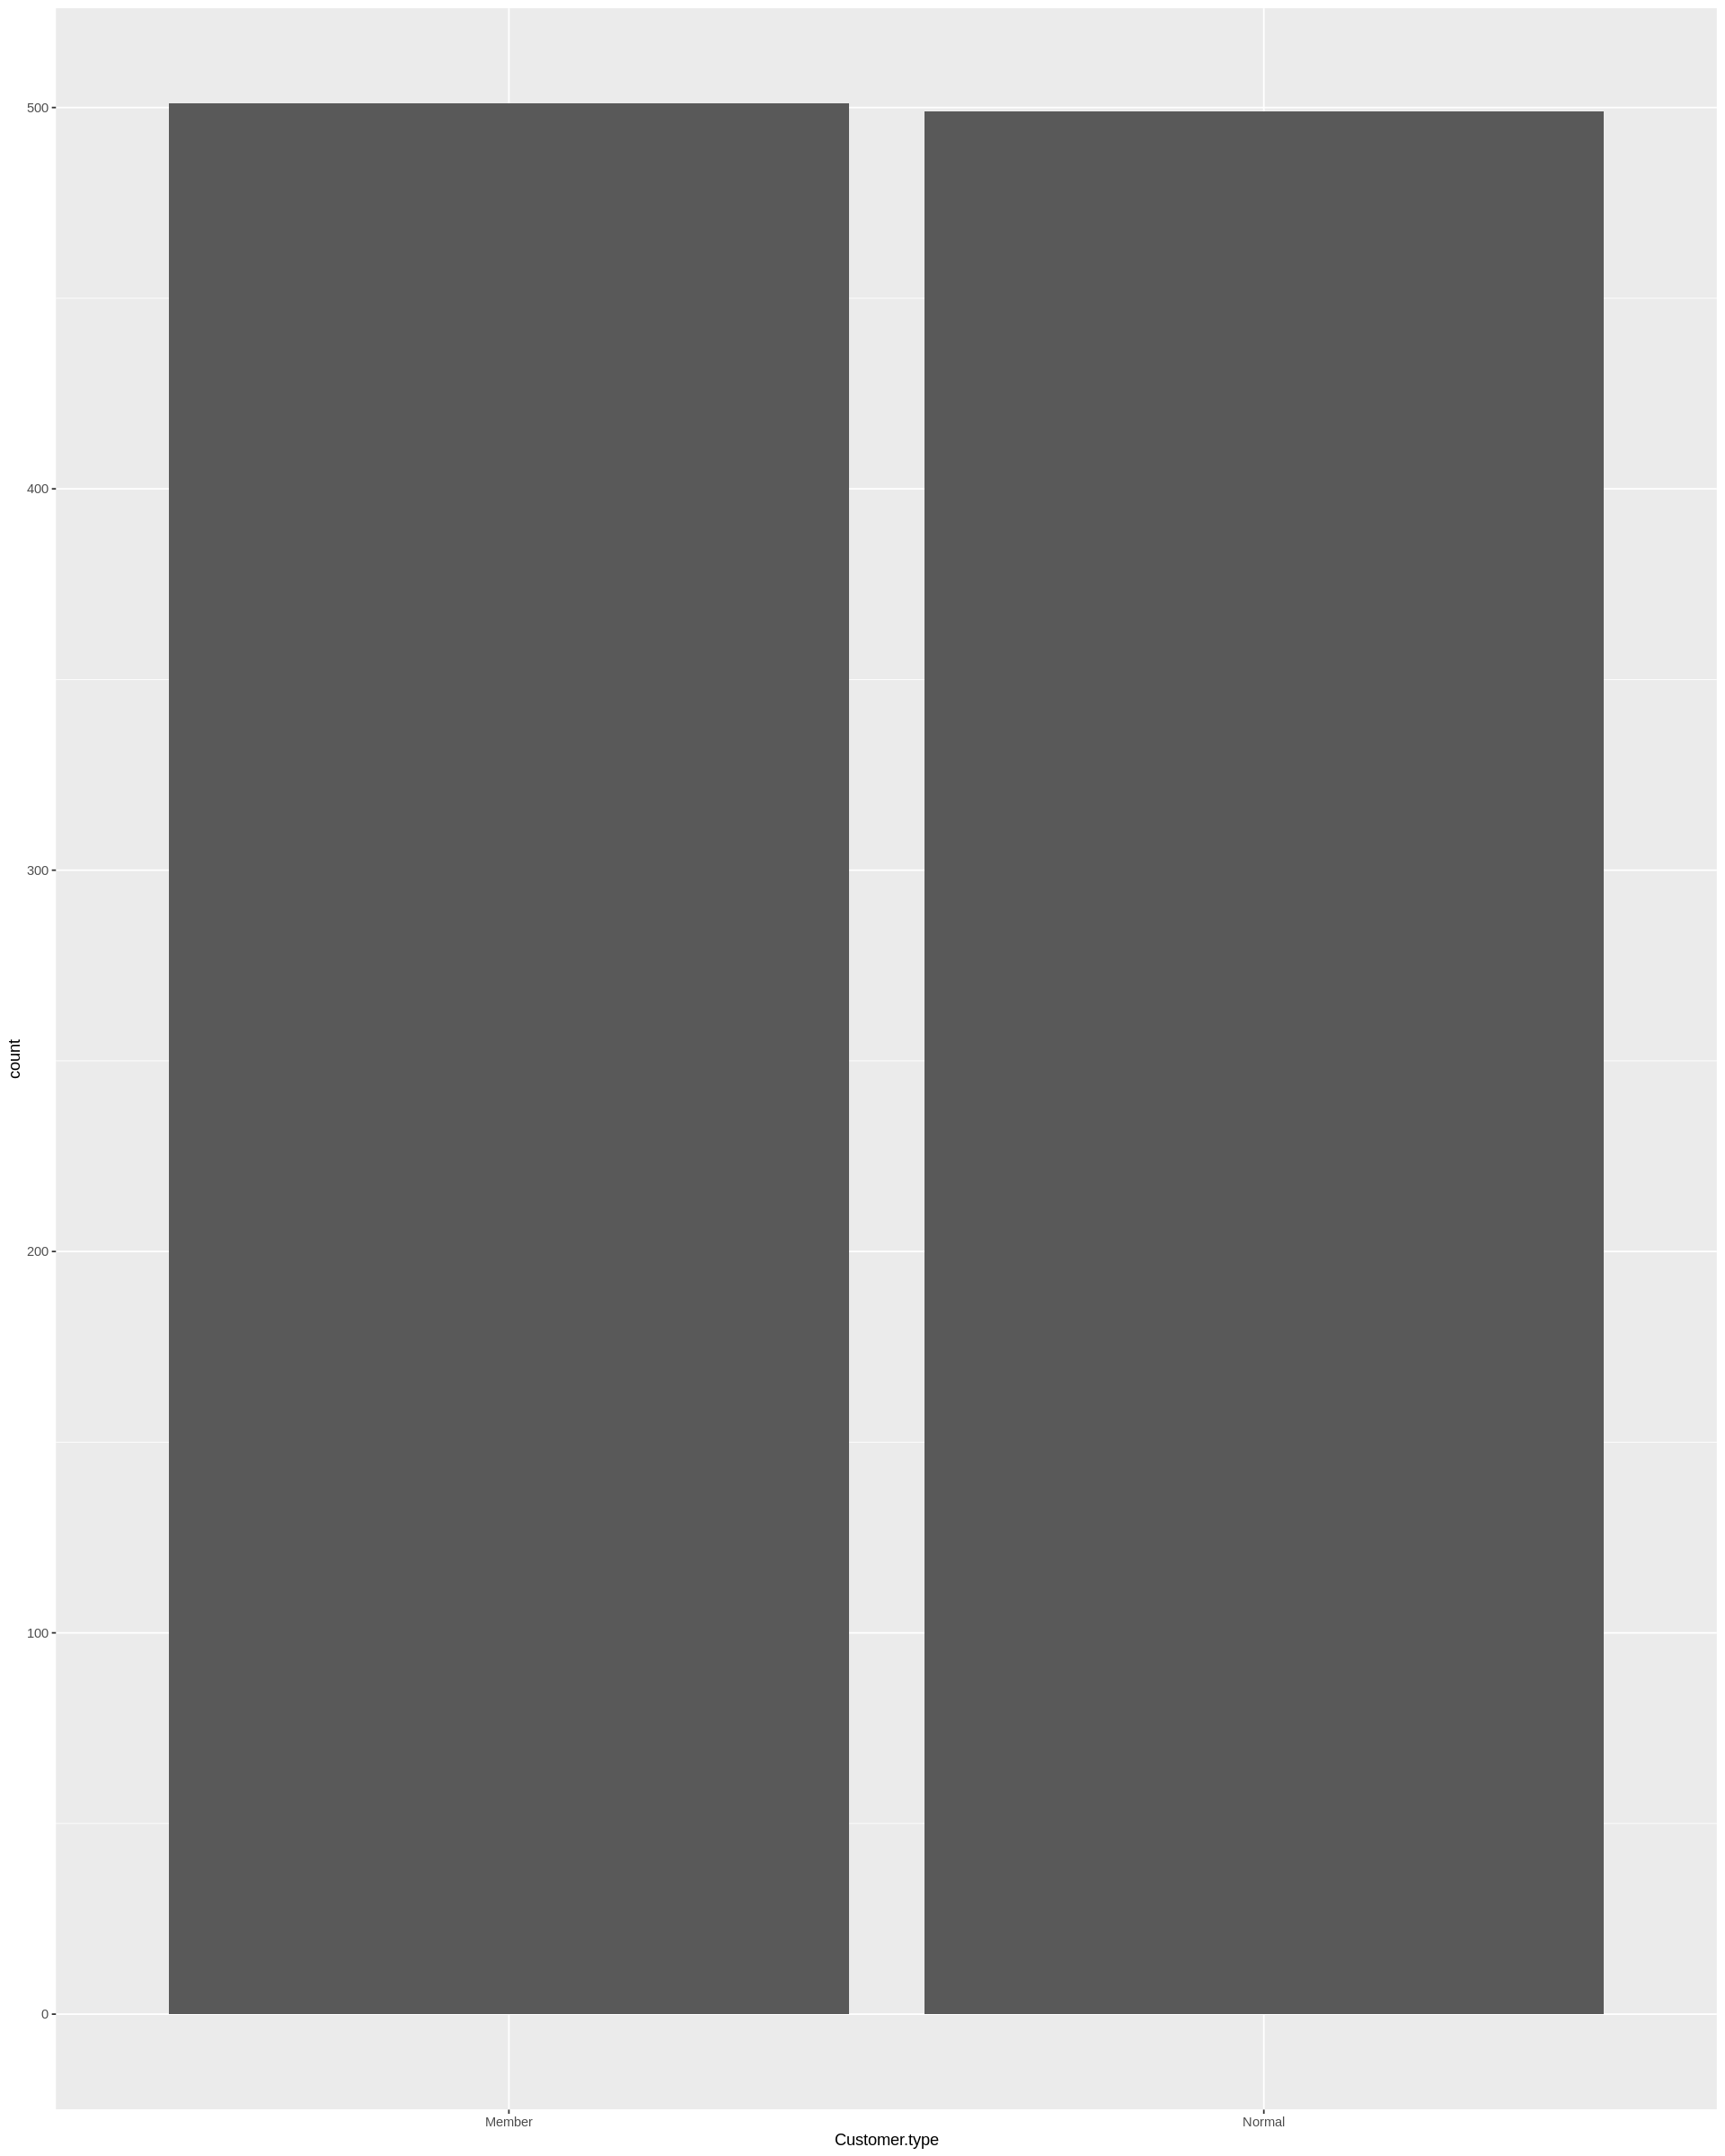

In [15]:
# Comparing total amount  by Customer type

ggplot(data = p1) + 
  geom_bar(mapping = aes(x = Customer.type, fill = Total), position = "dodge")

#  Males and females have an equal shopping count

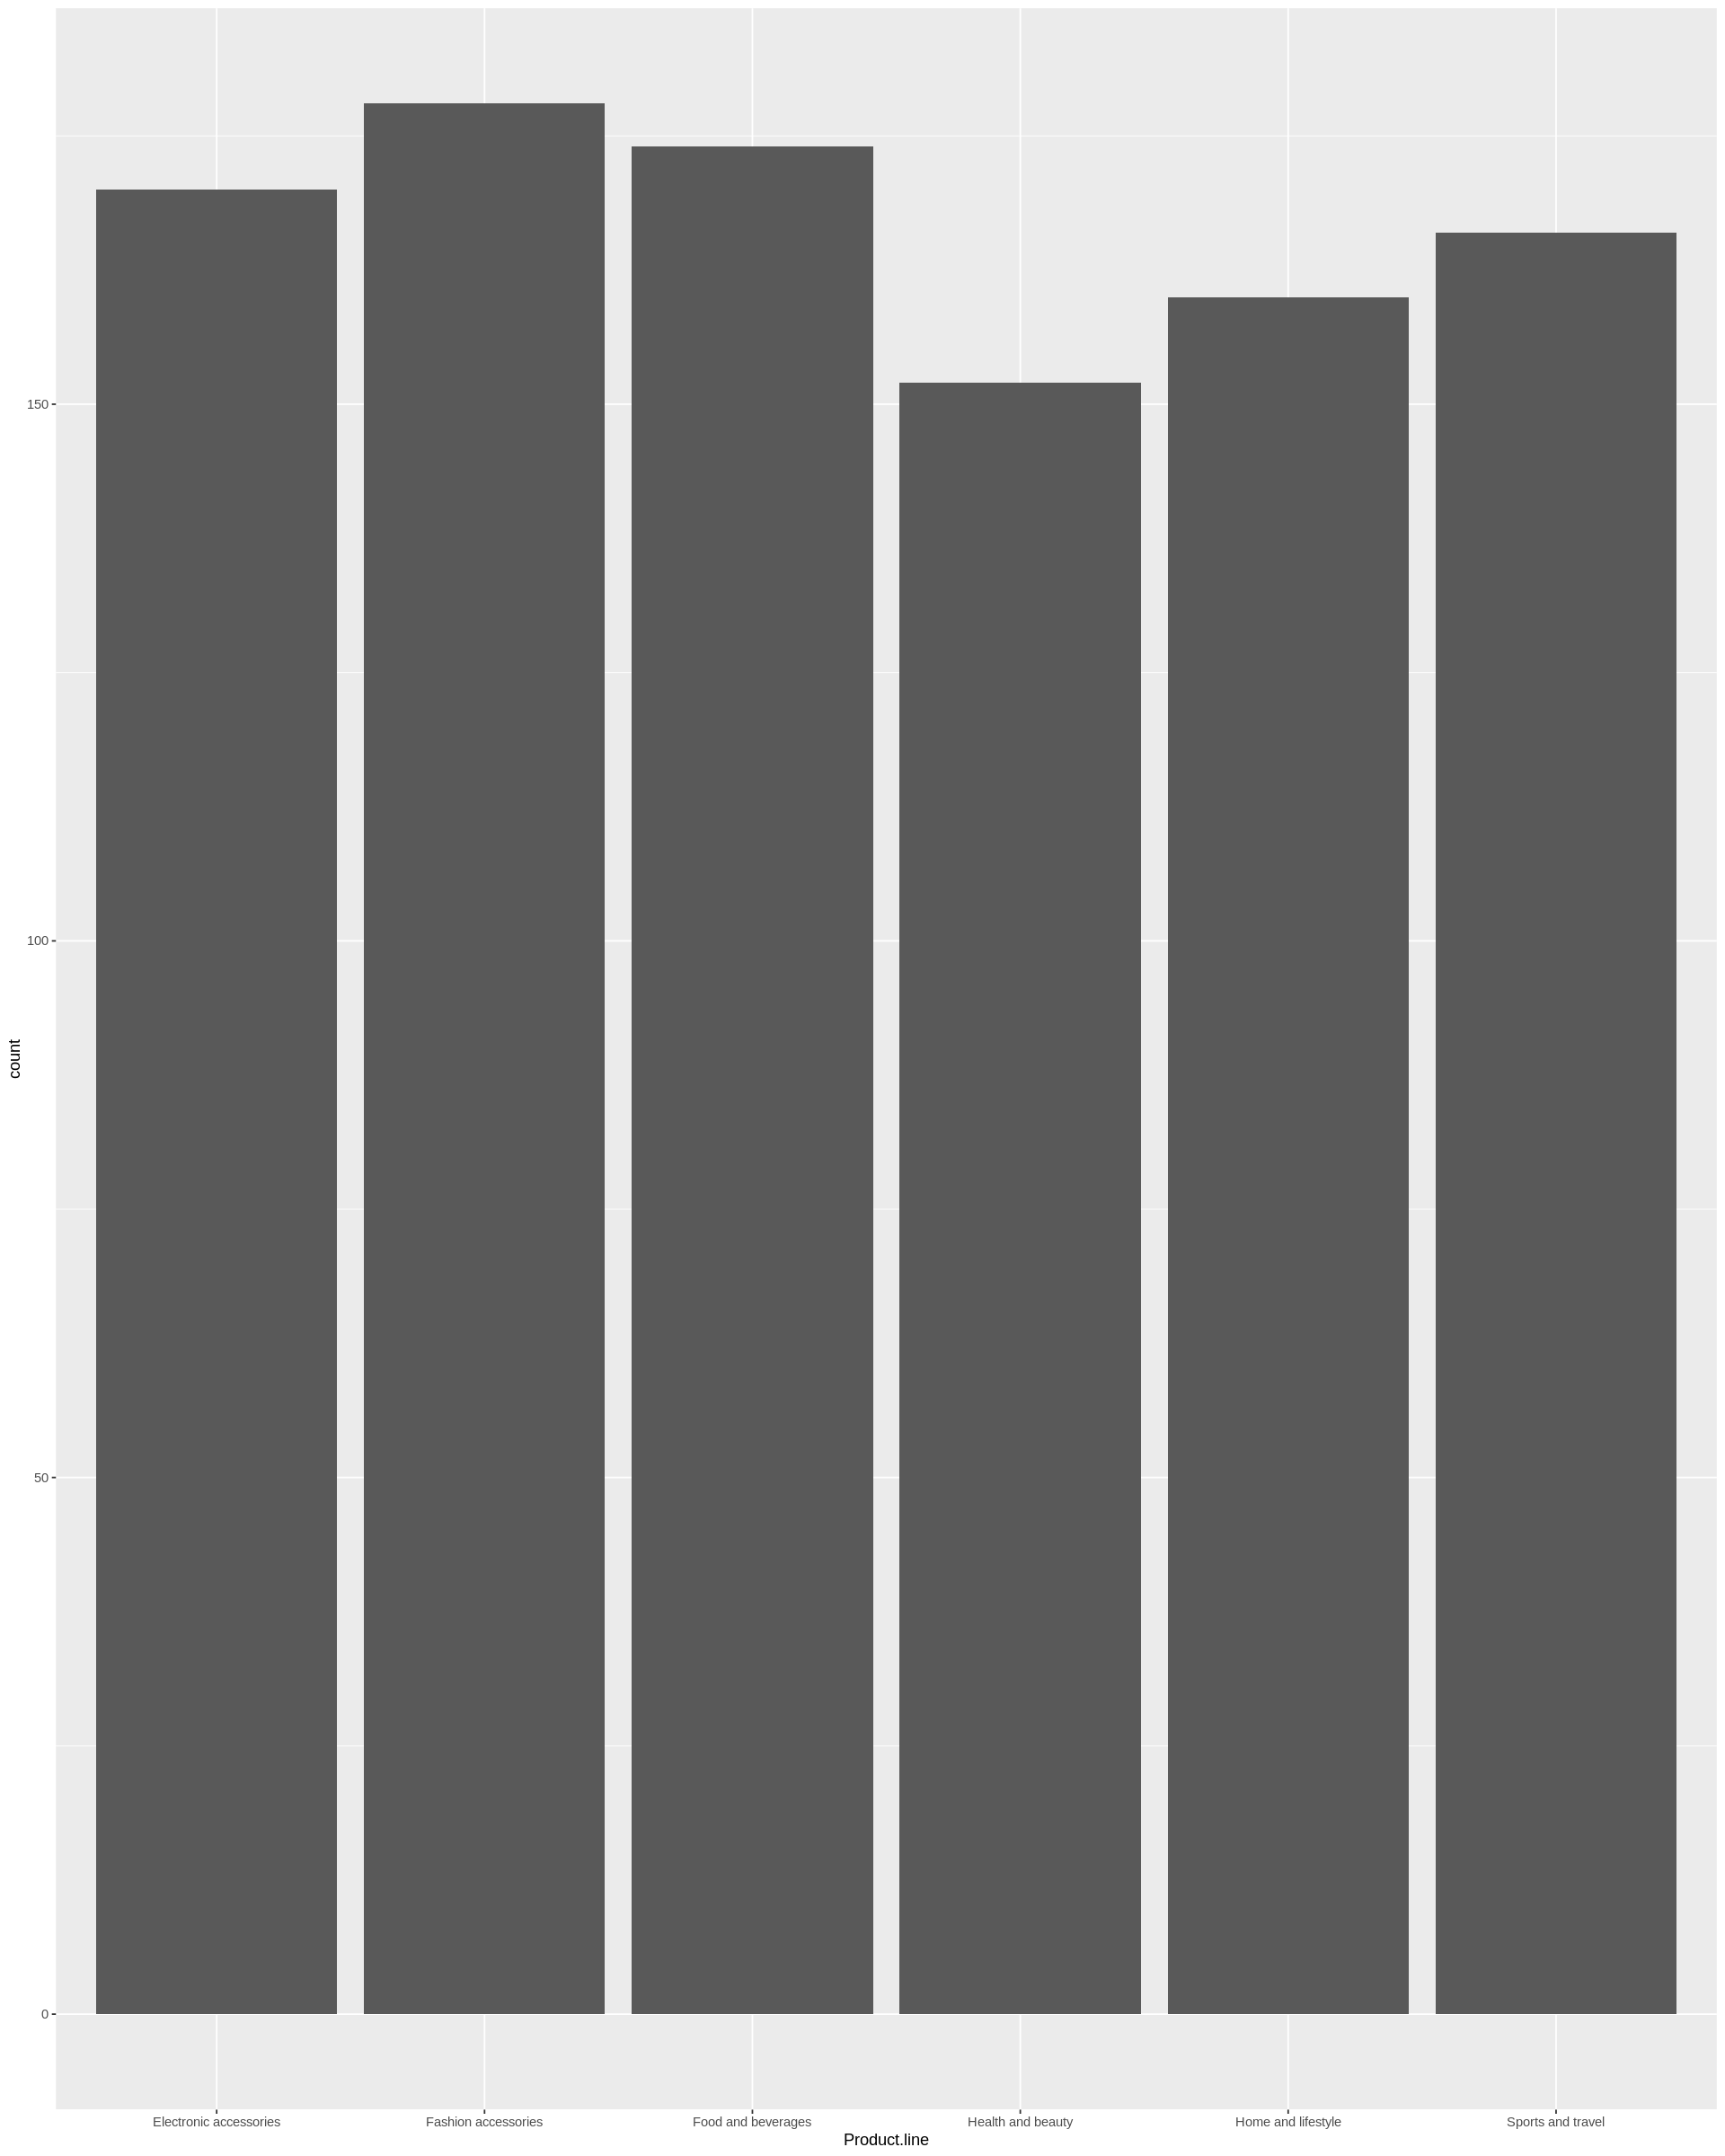

In [16]:
# Comparing total amount  by Product line

ggplot(data = p1) + 
  geom_bar(mapping = aes(x = Product.line, fill = Total), position = "dodge")

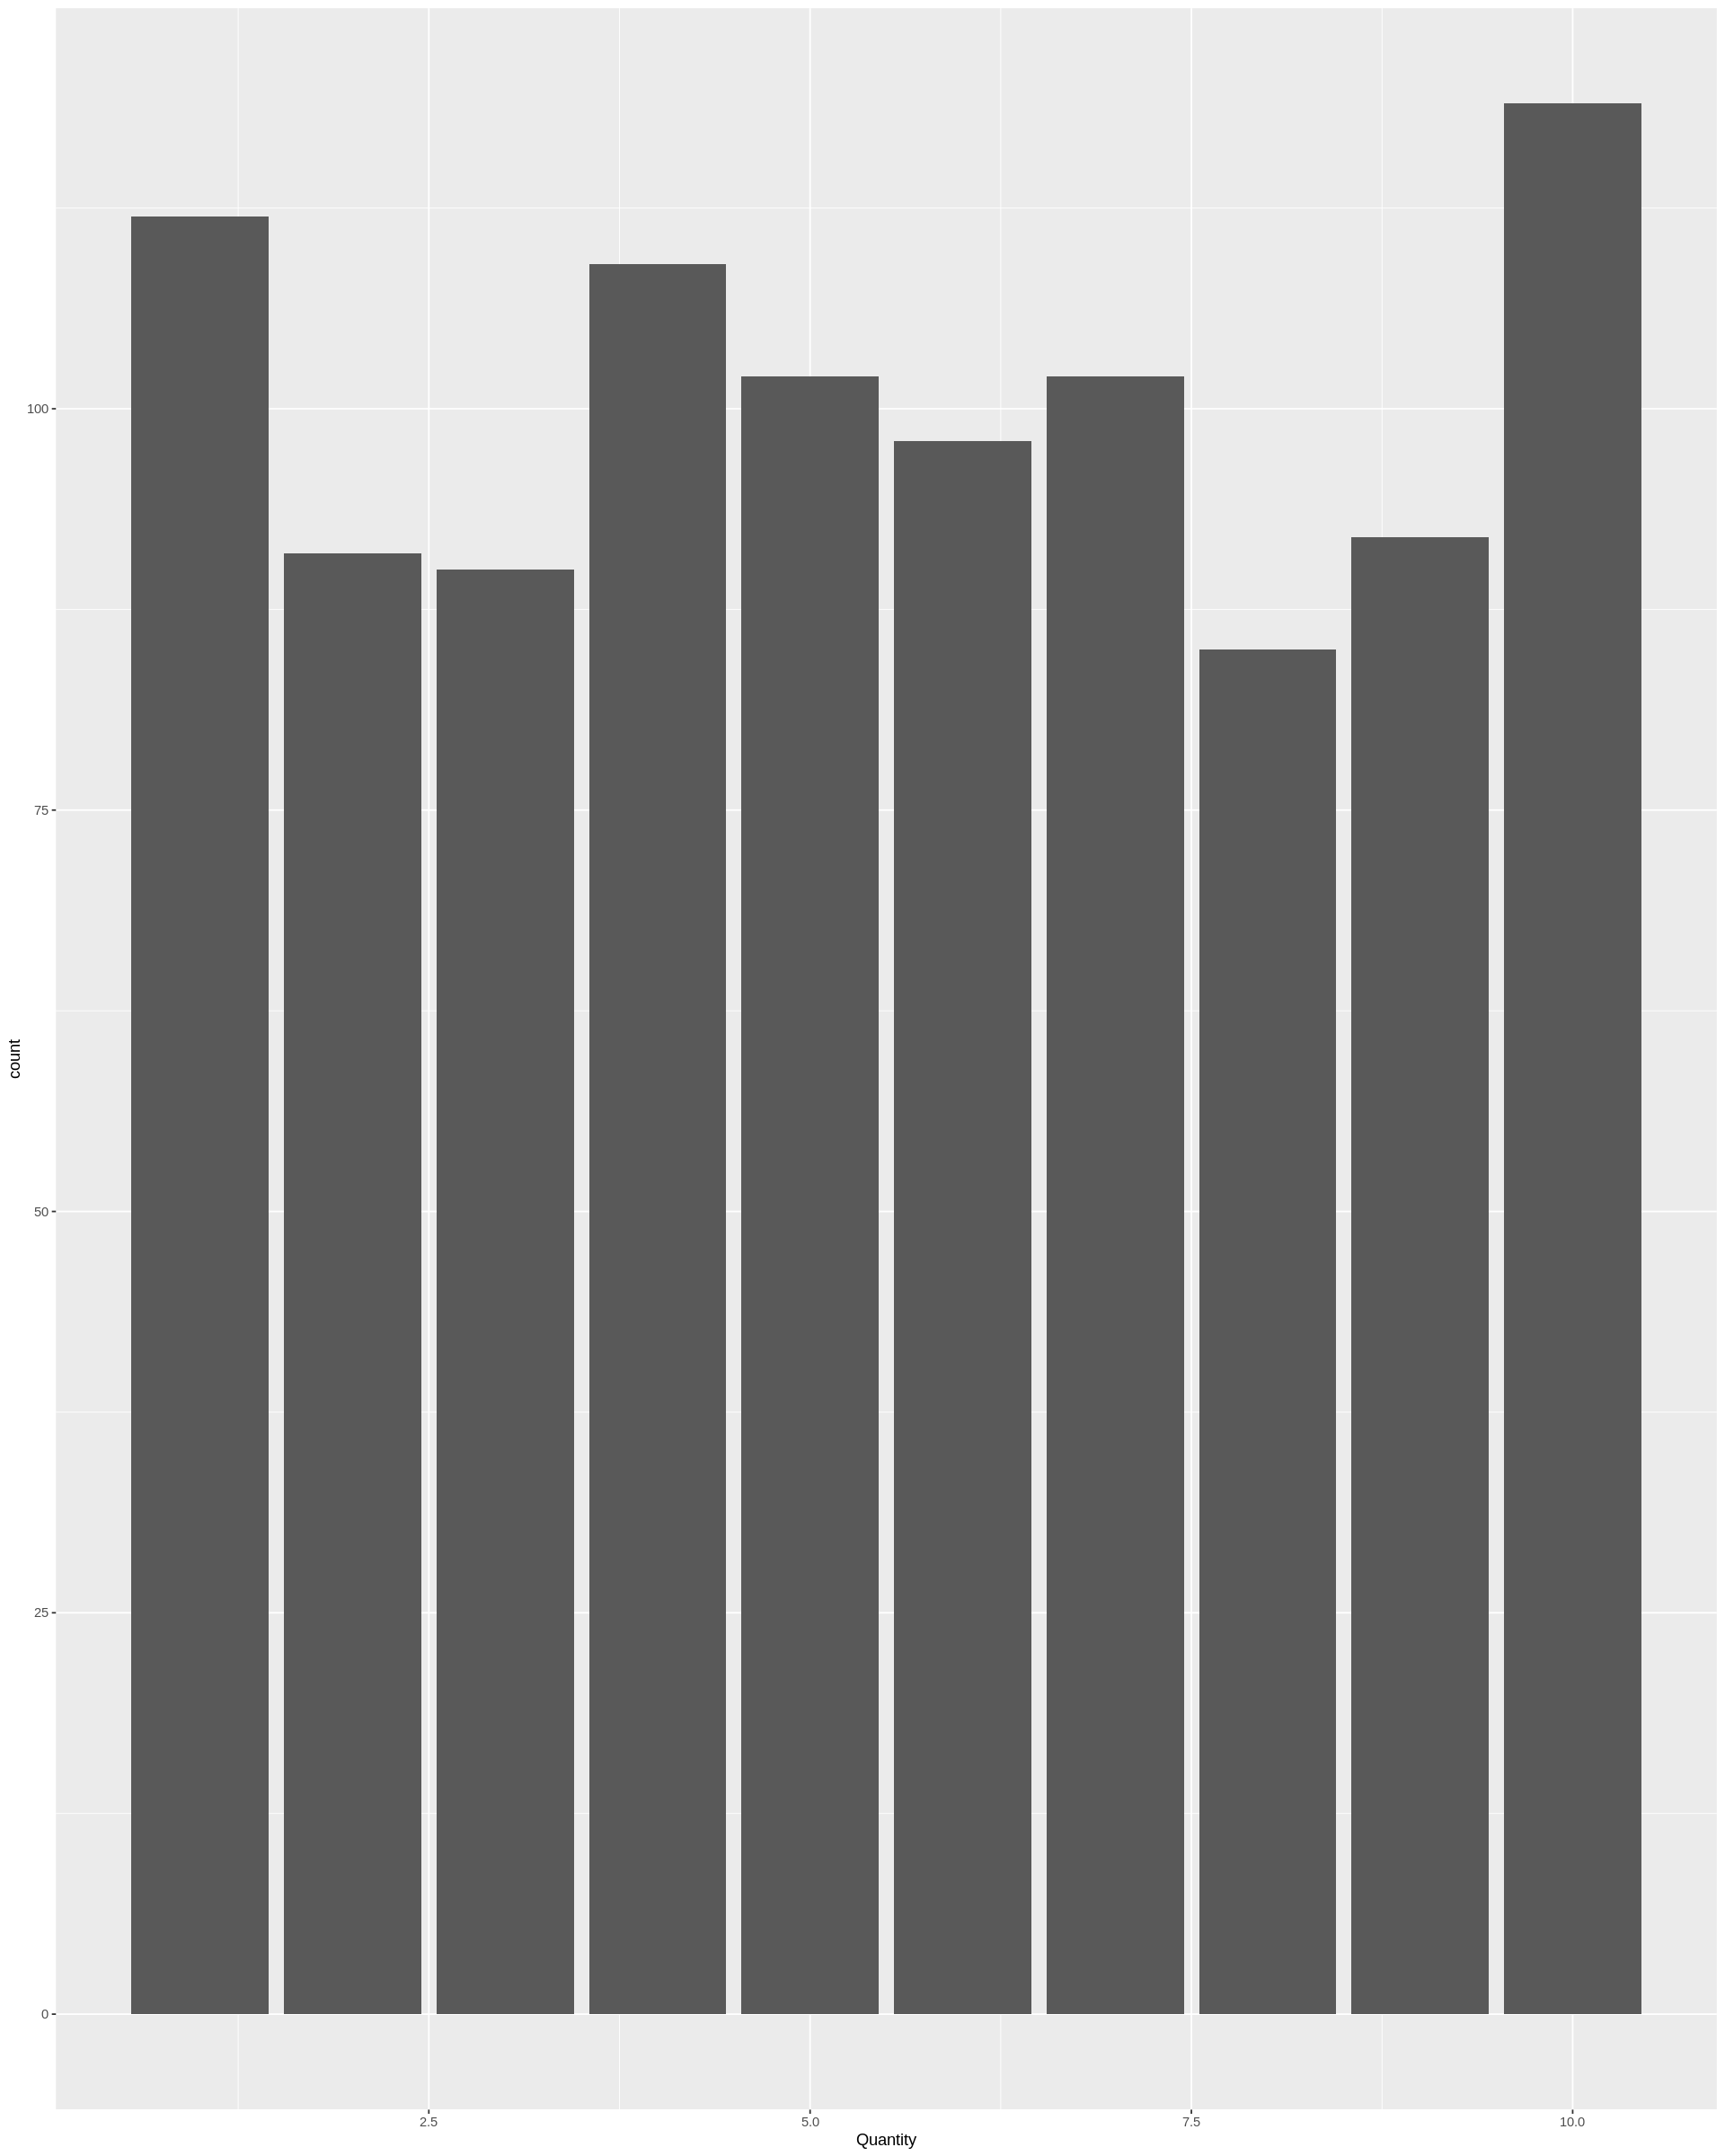

In [17]:
# Comparing total amount  by Quantity

ggplot(data = p1) + 
  geom_bar(mapping = aes(x = Quantity, fill = Total), position = "dodge")

## Multivariate

In [18]:
# Converting categorical attributes to numeric data type

p1$Branch <- as.integer(as.factor(p1$Branch))
p1$Customer.type <- as.integer(as.factor(p1$Customer.type))
p1$Gender <- as.integer(as.factor(p1$Gender))
p1$Product.line <- as.integer(as.factor(p1$Product.line))
p1$Payment <- as.integer(as.factor(p1$Payment))

p_1 <- p1[,-c(1,9,10)]

In [19]:
# PReviewing the head and the structure of the new dataset
str(p_1)
head(p_1)

'data.frame':	1000 obs. of  13 variables:
 $ Branch                 : int  1 3 1 1 1 3 1 3 1 2 ...
 $ Customer.type          : int  1 2 2 1 2 2 1 2 1 1 ...
 $ Gender                 : int  1 1 2 2 2 2 1 1 1 1 ...
 $ Product.line           : int  4 1 5 4 6 1 1 5 4 3 ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Payment                : int  3 1 2 3 3 3 3 3 2 2 ...
 $ cogs                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross.margin.percentage: num  4.76 4.76 4.76 4.76 4.76 ...
 $ gross.income           : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Rating                 : num  9.1 9.6 7.4 8.4 5.3 4.1 5.8 8 7.2 5.9 ...
 $ Total                  : num  549 80.2 340.5 489 634.4 ...


,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,4,74.69,7,26.1415,3,522.83,4.761905,26.1415,9.1,548.9715
2,3,2,1,1,15.28,5,3.8200,1,76.40,4.761905,3.8200,9.6,80.2200
3,1,2,2,5,46.33,7,16.2155,2,324.31,4.761905,16.2155,7.4,340.5255
4,1,1,2,4,58.22,8,23.2880,3,465.76,4.761905,23.2880,8.4,489.0480
5,1,2,2,6,86.31,7,30.2085,3,604.17,4.761905,30.2085,5.3,634.3785
6,3,2,2,1,85.39,7,29.8865,3,597.73,4.761905,29.8865,4.1,627.6165


In [20]:
# Because you can't divide by the standard deviation if it's infinity. 
# To identify the zero-variance column, we can use which as follows to get the variable name.

which(apply(p_1, 2, var)==0)
# The zero variance column is:
# gross.margin.percentage
# 10

gross.margin.percentage 
                     10

In [21]:
# To remove zero variance columns from the dataset, 
# you can use the same apply expression, setting variance not equal to zero

p_2 <- p_1[ , which(apply(p_1, 2, var) != 0)]
head(p_2)

,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Payment,cogs,gross.income,Rating,Total
,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,4,74.69,7,26.1415,3,522.83,26.1415,9.1,548.9715
2,3,2,1,1,15.28,5,3.8200,1,76.40,3.8200,9.6,80.2200
3,1,2,2,5,46.33,7,16.2155,2,324.31,16.2155,7.4,340.5255
4,1,1,2,4,58.22,8,23.2880,3,465.76,23.2880,8.4,489.0480
5,1,2,2,6,86.31,7,30.2085,3,604.17,30.2085,5.3,634.3785
6,3,2,2,1,85.39,7,29.8865,3,597.73,29.8865,4.1,627.6165


In [22]:
# Applying PCA  to dataset

p_2.pca <- prcomp(p_2[,c(1:12)], center = TRUE, scale. = TRUE)
summary(p_2.pca)

# As a result we obtain 12 principal components, 
# each which explain a percentate of the total variation of the dataset
# PC1 explains 41% of the total variance, which means that less than half 
# of the information in the dataset (12 variables) can be encapsulated 
# by just that one Principal Component. PC2 explains 9.4% of the variance.

Importance of components:
                          PC1     PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     2.2201 1.06317 1.0317 1.0099 0.99289 0.97714 0.96273
Proportion of Variance 0.4107 0.09419 0.0887 0.0850 0.08215 0.07957 0.07724
Cumulative Proportion  0.4107 0.50493 0.5936 0.6786 0.76078 0.84035 0.91758
                           PC8     PC9      PC10      PC11      PC12
Standard deviation     0.94823 0.29977 2.118e-16 1.483e-16 1.211e-16
Proportion of Variance 0.07493 0.00749 0.000e+00 0.000e+00 0.000e+00
Cumulative Proportion  0.99251 1.00000 1.000e+00 1.000e+00 1.000e+00

* With only 12 components, the variance explained is ~ 91.127%.

# Feature selection

In [23]:
# Head of the cleaned dataset

str(p_2)
head(p_2)

'data.frame':	1000 obs. of  12 variables:
 $ Branch       : int  1 3 1 1 1 3 1 3 1 2 ...
 $ Customer.type: int  1 2 2 1 2 2 1 2 1 1 ...
 $ Gender       : int  1 1 2 2 2 2 1 1 1 1 ...
 $ Product.line : int  4 1 5 4 6 1 1 5 4 3 ...
 $ Unit.price   : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity     : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax          : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Payment      : int  3 1 2 3 3 3 3 3 2 2 ...
 $ cogs         : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross.income : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Rating       : num  9.1 9.6 7.4 8.4 5.3 4.1 5.8 8 7.2 5.9 ...
 $ Total        : num  549 80.2 340.5 489 634.4 ...


,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Payment,cogs,gross.income,Rating,Total
,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,4,74.69,7,26.1415,3,522.83,26.1415,9.1,548.9715
2,3,2,1,1,15.28,5,3.8200,1,76.40,3.8200,9.6,80.2200
3,1,2,2,5,46.33,7,16.2155,2,324.31,16.2155,7.4,340.5255
4,1,1,2,4,58.22,8,23.2880,3,465.76,23.2880,8.4,489.0480
5,1,2,2,6,86.31,7,30.2085,3,604.17,30.2085,5.3,634.3785
6,3,2,2,1,85.39,7,29.8865,3,597.73,29.8865,4.1,627.6165


## Filter Methods 

In [24]:
# We can use the findCorrelation function included in the caret package to create a subset of variabes. 
# This function would allow us to remove redundancy by correlation using the given dataset. 
# It would search through a correlation matrix and return a vector of integers corresponding to the columns, 
# to remove or reduce pair-wise correlations.

In [25]:
# Installing and loading our caret package

suppressWarnings(
        suppressMessages(if
                         (!require(caret, quietly=TRUE))
                install.packages("caret")))
library(caret)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [26]:
# Installing and loading the corrplot package for plotting

suppressWarnings(
        suppressMessages(if
                         (!require(corrplot, quietly=TRUE))
                install.packages("corrplot")))
library(corrplot)

In [27]:
# Calculating the correlation matrix

correlationMatrix <- cor(p_2)
correlationMatrix

,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Payment,cogs,gross.income,Rating,Total
Branch,1.00000000,-0.01960787,-0.056317558,-0.053937557,0.028202440,0.01596379,0.04104666,-0.050104288,0.04104666,0.04104666,0.010238476,0.04104666
Customer.type,-0.01960787,1.00000000,0.039996160,-0.036800311,-0.020237875,-0.01676271,-0.01967028,0.018073436,-0.01967028,-0.01967028,0.018888672,-0.01967028
Gender,-0.05631756,0.03999616,1.000000000,0.005193197,0.015444630,-0.07425831,-0.04945099,0.044577609,-0.04945099,-0.04945099,0.004800208,-0.04945099
Product.line,-0.05393756,-0.03680031,0.005193197,1.000000000,0.019321028,0.02025600,0.03162072,0.029896383,0.03162072,0.03162072,-0.020528973,0.03162072
Unit.price,0.02820244,-0.02023787,0.015444630,0.019321028,1.000000000,0.01077756,0.63396209,-0.015941048,0.63396209,0.63396209,-0.008777507,0.63396209
Quantity,0.01596379,-0.01676271,-0.074258307,0.020256001,0.010777564,1.00000000,0.70551019,-0.003920990,0.70551019,0.70551019,-0.015814905,0.70551019
Tax,0.04104666,-0.01967028,-0.049450989,0.031620725,0.633962089,0.70551019,1.00000000,-0.012433637,1.00000000,1.00000000,-0.036441705,1.00000000
Payment,-0.05010429,0.01807344,0.044577609,0.029896383,-0.015941048,-0.00392099,-0.01243364,1.000000000,-0.01243364,-0.01243364,-0.005381289,-0.01243364
cogs,0.04104666,-0.01967028,-0.049450989,0.031620725,0.633962089,0.70551019,1.00000000,-0.012433637,1.00000000,1.00000000,-0.036441705,1.00000000
gross.income,0.04104666,-0.01967028,-0.049450989,0.031620725,0.633962089,0.70551019,1.00000000,-0.012433637,1.00000000,1.00000000,-0.036441705,1.00000000


In [28]:
# Find attributes that are highly correlated

highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.75)

# Highly correlated attributes

highlyCorrelated

[1]  9 12  7

In [29]:
# Names of the highly correlated variables

names(p_2[,highlyCorrelated])

[1] "cogs"  "Total" "Tax"

In [30]:
# We can remove the variables with a higher correlation 
# and comparing the results graphically as shown below

# Removing Redundant Features 

p_12 <- p_2[-highlyCorrelated]
head(p_12, 3)

,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Payment,gross.income,Rating
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>
1,1,1,1,4,74.69,7,3,26.1415,9.1
2,3,2,1,1,15.28,5,1,3.8200,9.6
3,1,2,2,5,46.33,7,2,16.2155,7.4


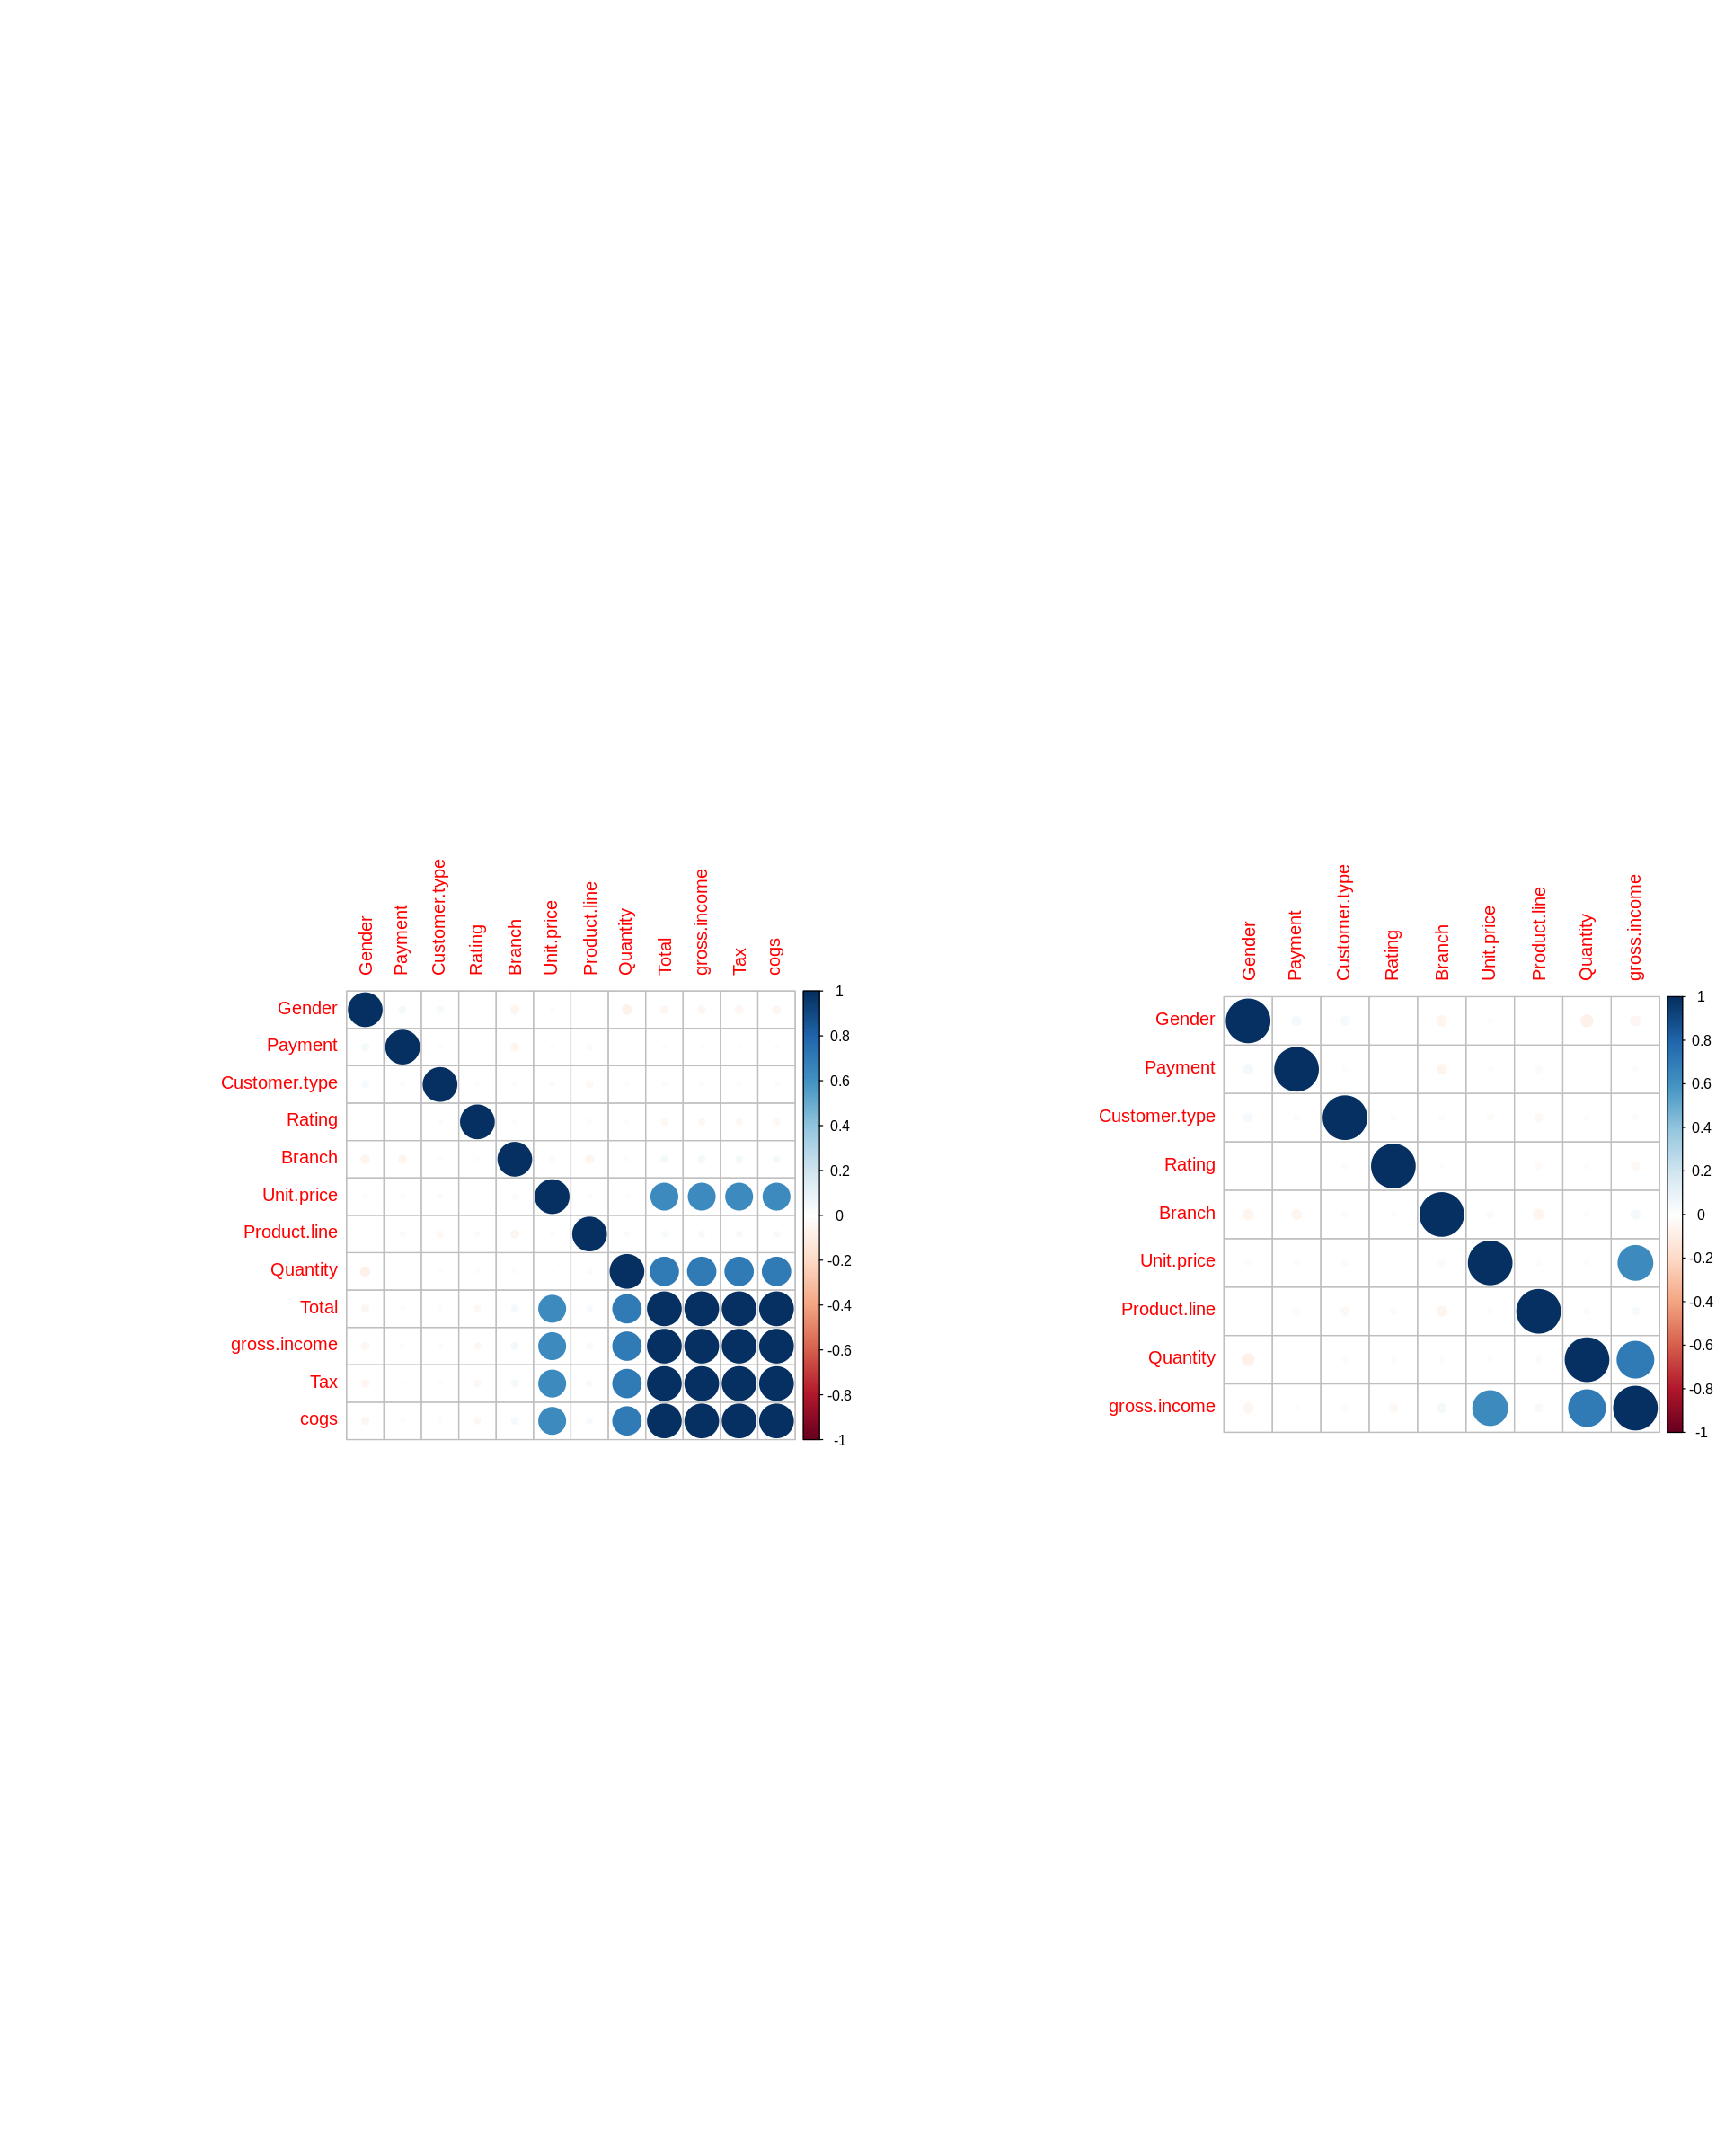

In [31]:
# Performing our graphical comparison

par(mfrow = c(1, 2))
corrplot(correlationMatrix, order = "hclust")
corrplot(cor(p_12), order = "hclust")

## Wrapper Methods 

In [32]:
# We use the clustvarsel package that contains an implementation of wrapper methods. 
# The clustvarsel function will implement variable section methodology 
# for model-based clustering to find the optimal subset of variables in a dataset.

In [33]:
# Installing and loading our clustvarsel package
 
suppressWarnings(
        suppressMessages(if
                         (!require(clustvarsel, quietly=TRUE))
                install.packages("clustvarsel")))
library(clustvarsel)                

Loading required package: mclust

Package 'mclust' version 5.4.6
Type 'citation("mclust")' for citing this R package in publications.


Attaching package: ‘mclust’


The following object is masked from ‘package:psych’:

    sim


The following object is masked from ‘package:purrr’:

    map


Package 'clustvarsel' version 2.3.3

Type 'citation("clustvarsel")' for citing this R package in publications.



In [34]:
# Installing and loading our mclust package

suppressWarnings(
        suppressMessages(if
                         (!require(mclust, quietly=TRUE))
                install.packages("mclust")))
library(mclust)

In [35]:
# Sequential forward greedy search (default)

out = clustvarsel(p_2, G = 1:12)
out

------------------------------------------------------ 
Variable selection for Gaussian model-based clustering
Stepwise (forward/backward) greedy search
------------------------------------------------------ 

 Variable proposed Type of step  BICclust Model  G     BICdiff Decision
          Quantity          Add -4192.156     E  9    804.0515 Accepted
            Branch          Add 55588.282   EEI 11  62228.4480 Accepted
           Payment          Add -9145.669   EEV  4 -62254.7737 Rejected
            Branch       Remove -4192.156     E  9  62228.4480 Rejected

Selected subset: Quantity, Branch

In [36]:
# The selection algorithm would indicate that the subset 
# we use for the clustering model is composed of variables Quantity and Branch 
# and that other variables should be rejected. 
# Having identified the variables that we use, we proceed to build the clustering model:

Subset1 = p_2[,out$subset]
mod = Mclust(Subset1, G = 1:12)
summary(mod)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEI (diagonal, equal shape) model with 2 components: 

 log-likelihood    n df       BIC       ICL
      -3517.933 1000  8 -7091.127 -7092.143

Clustering table:
  1   2 
340 660 

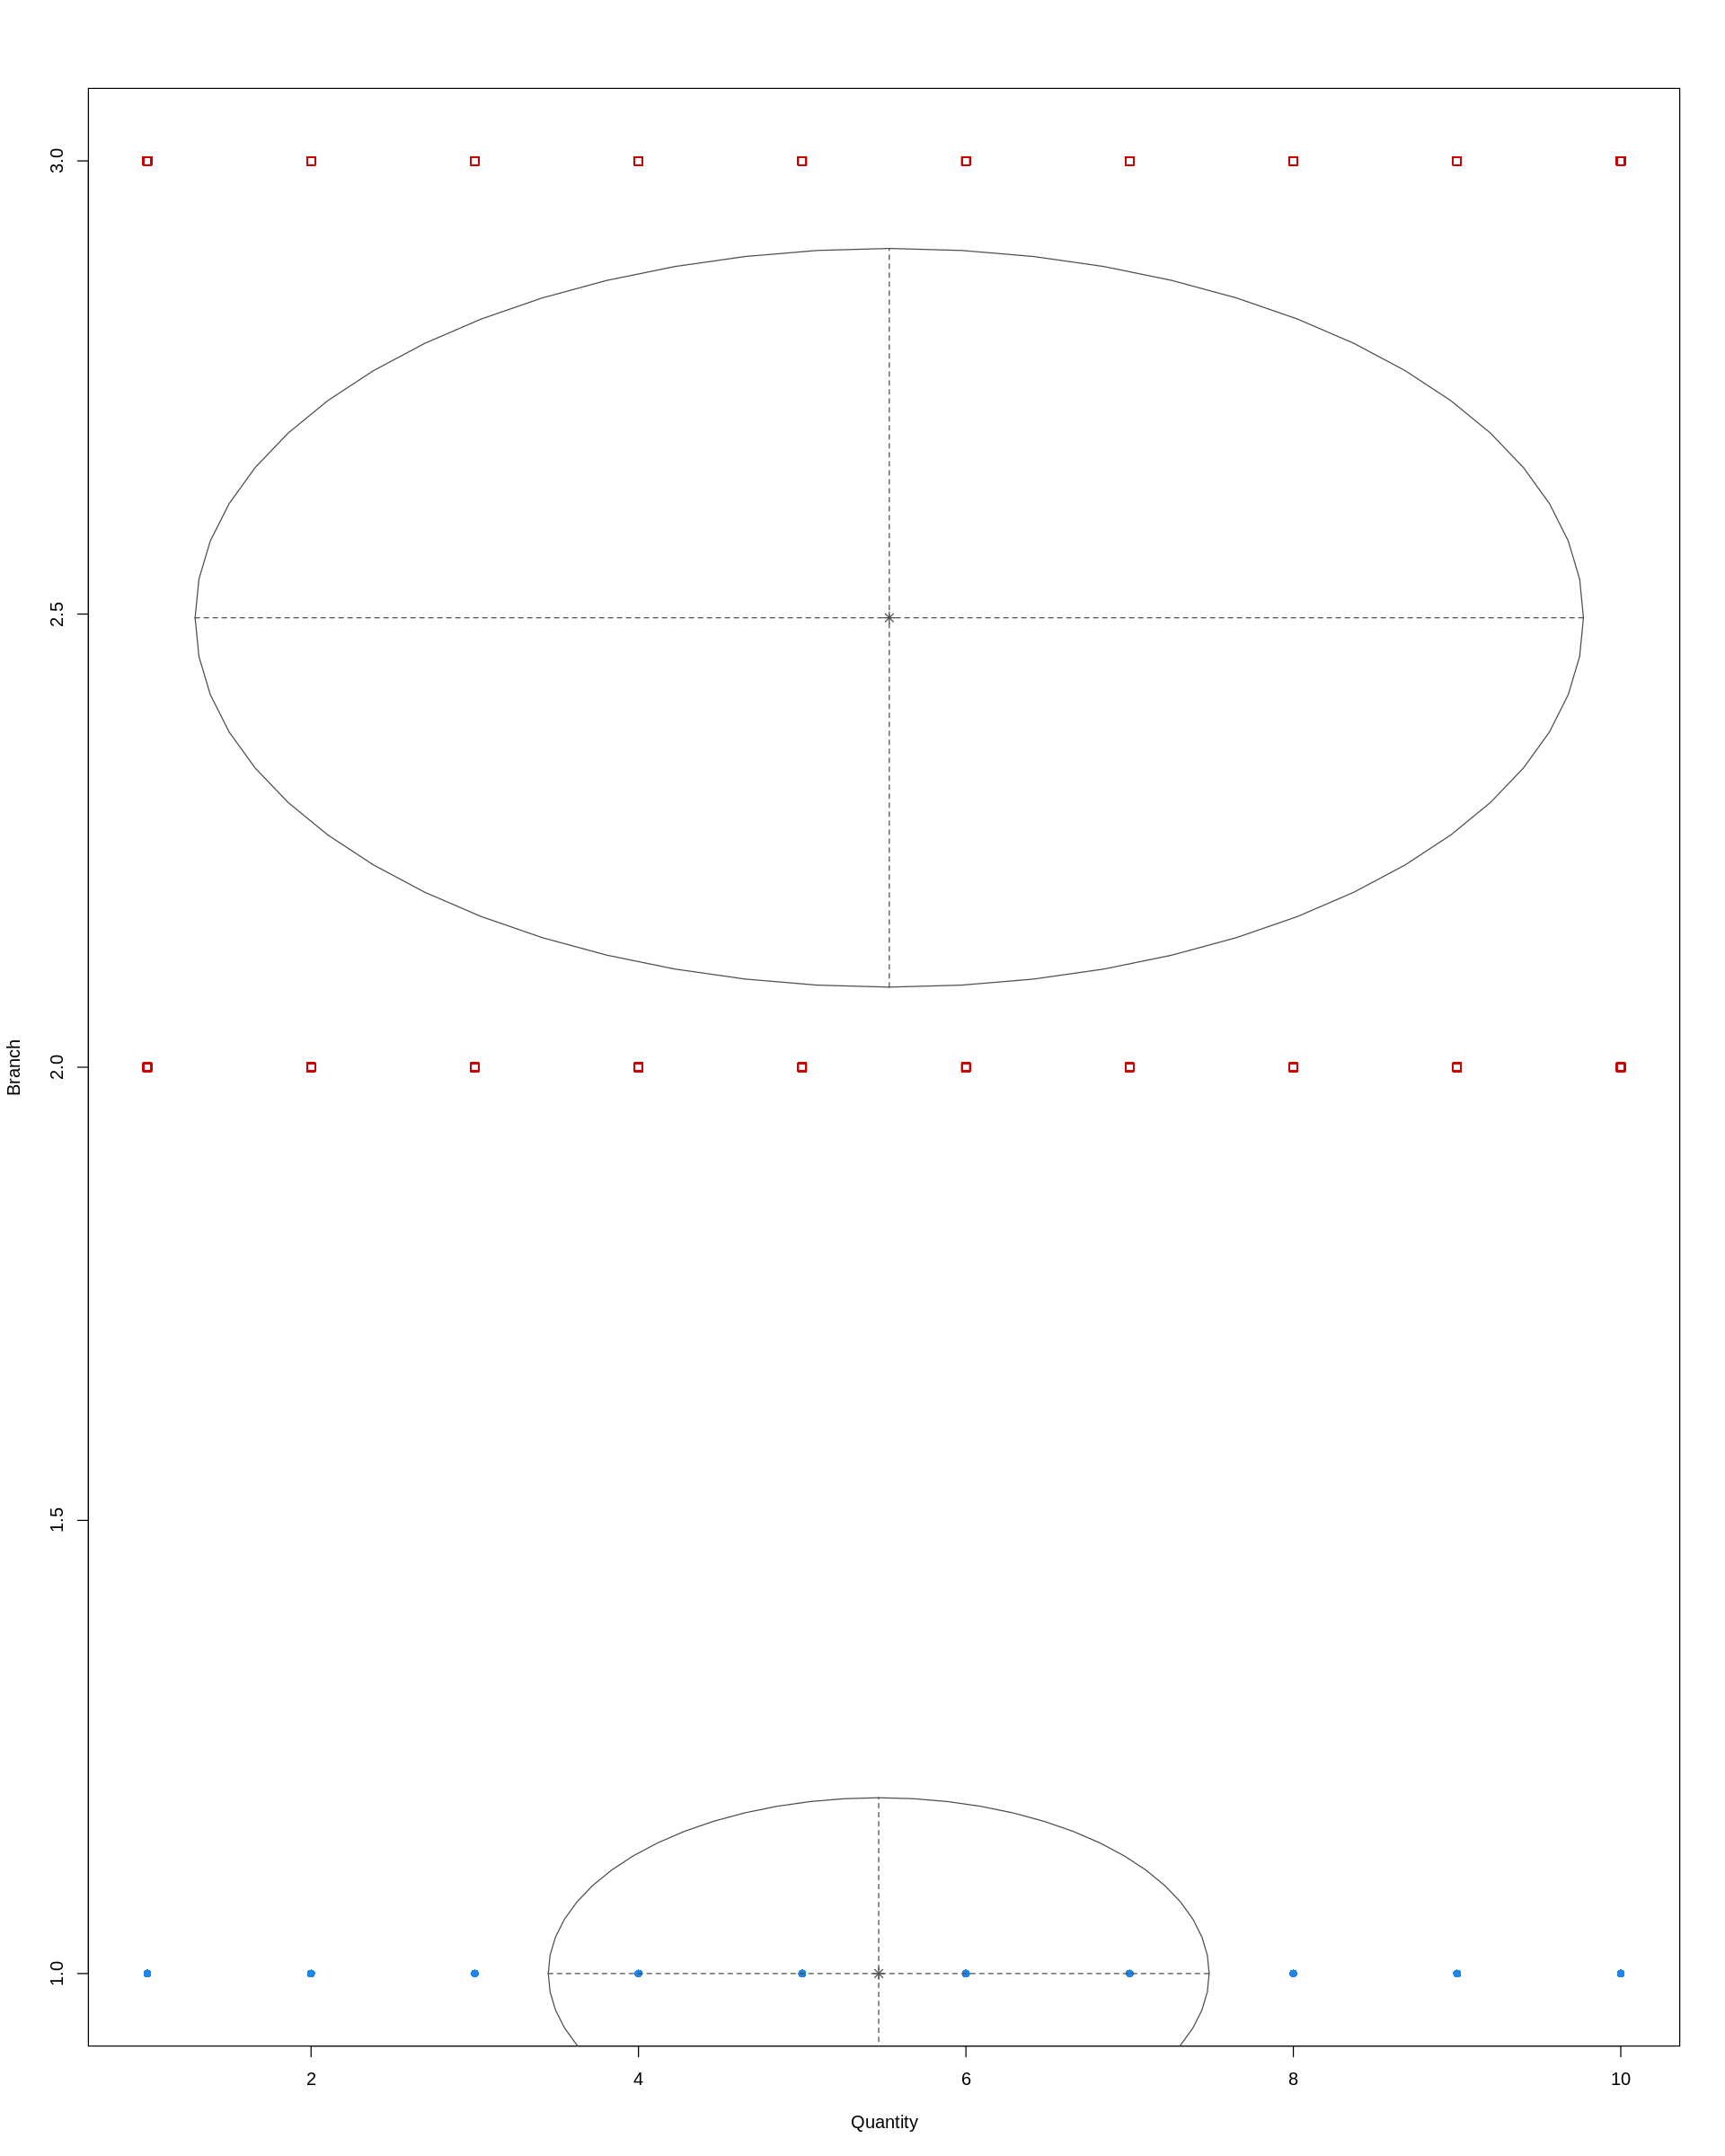

In [37]:
plot(mod,c("classification"))

## Embedded Methods

In [38]:
# We will use the ewkm function from the wskm package.
# This is a weighted subspace clustering algorithm that is well suited to very high dimensional data.

# We install and load our wskm package

suppressWarnings(
        suppressMessages(if
                         (!require(wskm, quietly=TRUE))
                install.packages("wskm")))
library(wskm)

Loading required package: latticeExtra


Attaching package: ‘latticeExtra’


The following object is masked from ‘package:ggplot2’:

    layer


Loading required package: fpc



In [39]:
set.seed(2)

model <- ewkm(p_2[1:12], 3, lambda=2, maxiter=1000)
head(model, 11)

,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Payment,cogs,gross.income,Rating,Total
1,1.927835,1.443299,1.546392,3.484536,44.09619,2.876289,3.926082,2.061856,78.52165,3.926082,6.737113,82.44773
2,2.030612,1.482993,1.469388,3.551020,77.38054,8.088435,30.864925,2.003401,617.29850,30.864925,6.866667,648.16343
3,1.977011,1.515599,1.505747,3.399015,47.03599,4.684729,9.727834,1.990148,194.55668,9.727834,7.061412,204.28452
,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Payment,cogs,gross.income,Rating,Total
1,8.332778e-06,0.006652867,0.006318625,8.332778e-06,8.332778e-06,8.332778e-06,4.934809e-01,8.332778e-06,8.332778e-06,4.934809e-01,8.332778e-06,8.332778e-06
2,8.332639e-06,0.476168776,0.523747898,8.332639e-06,8.332639e-06,8.332639e-06,8.332639e-06,8.332639e-06,8.332639e-06,8.332639e-06,8.332639e-06,8.332639e-06
3,8.332639e-06,0.515961386,0.483955287,8.332639e-06,8.332639e-06,8.332639e-06,8.332639e-06,8.332639e-06,8.332639e-06,8.332639e-06,8.332639e-06,8.332639e-06


In [40]:
# Loading and installing our cluster package

suppressWarnings(
        suppressMessages(if
                         (!require(cluster, quietly=TRUE))
                install.packages("cluster")))
library("cluster")

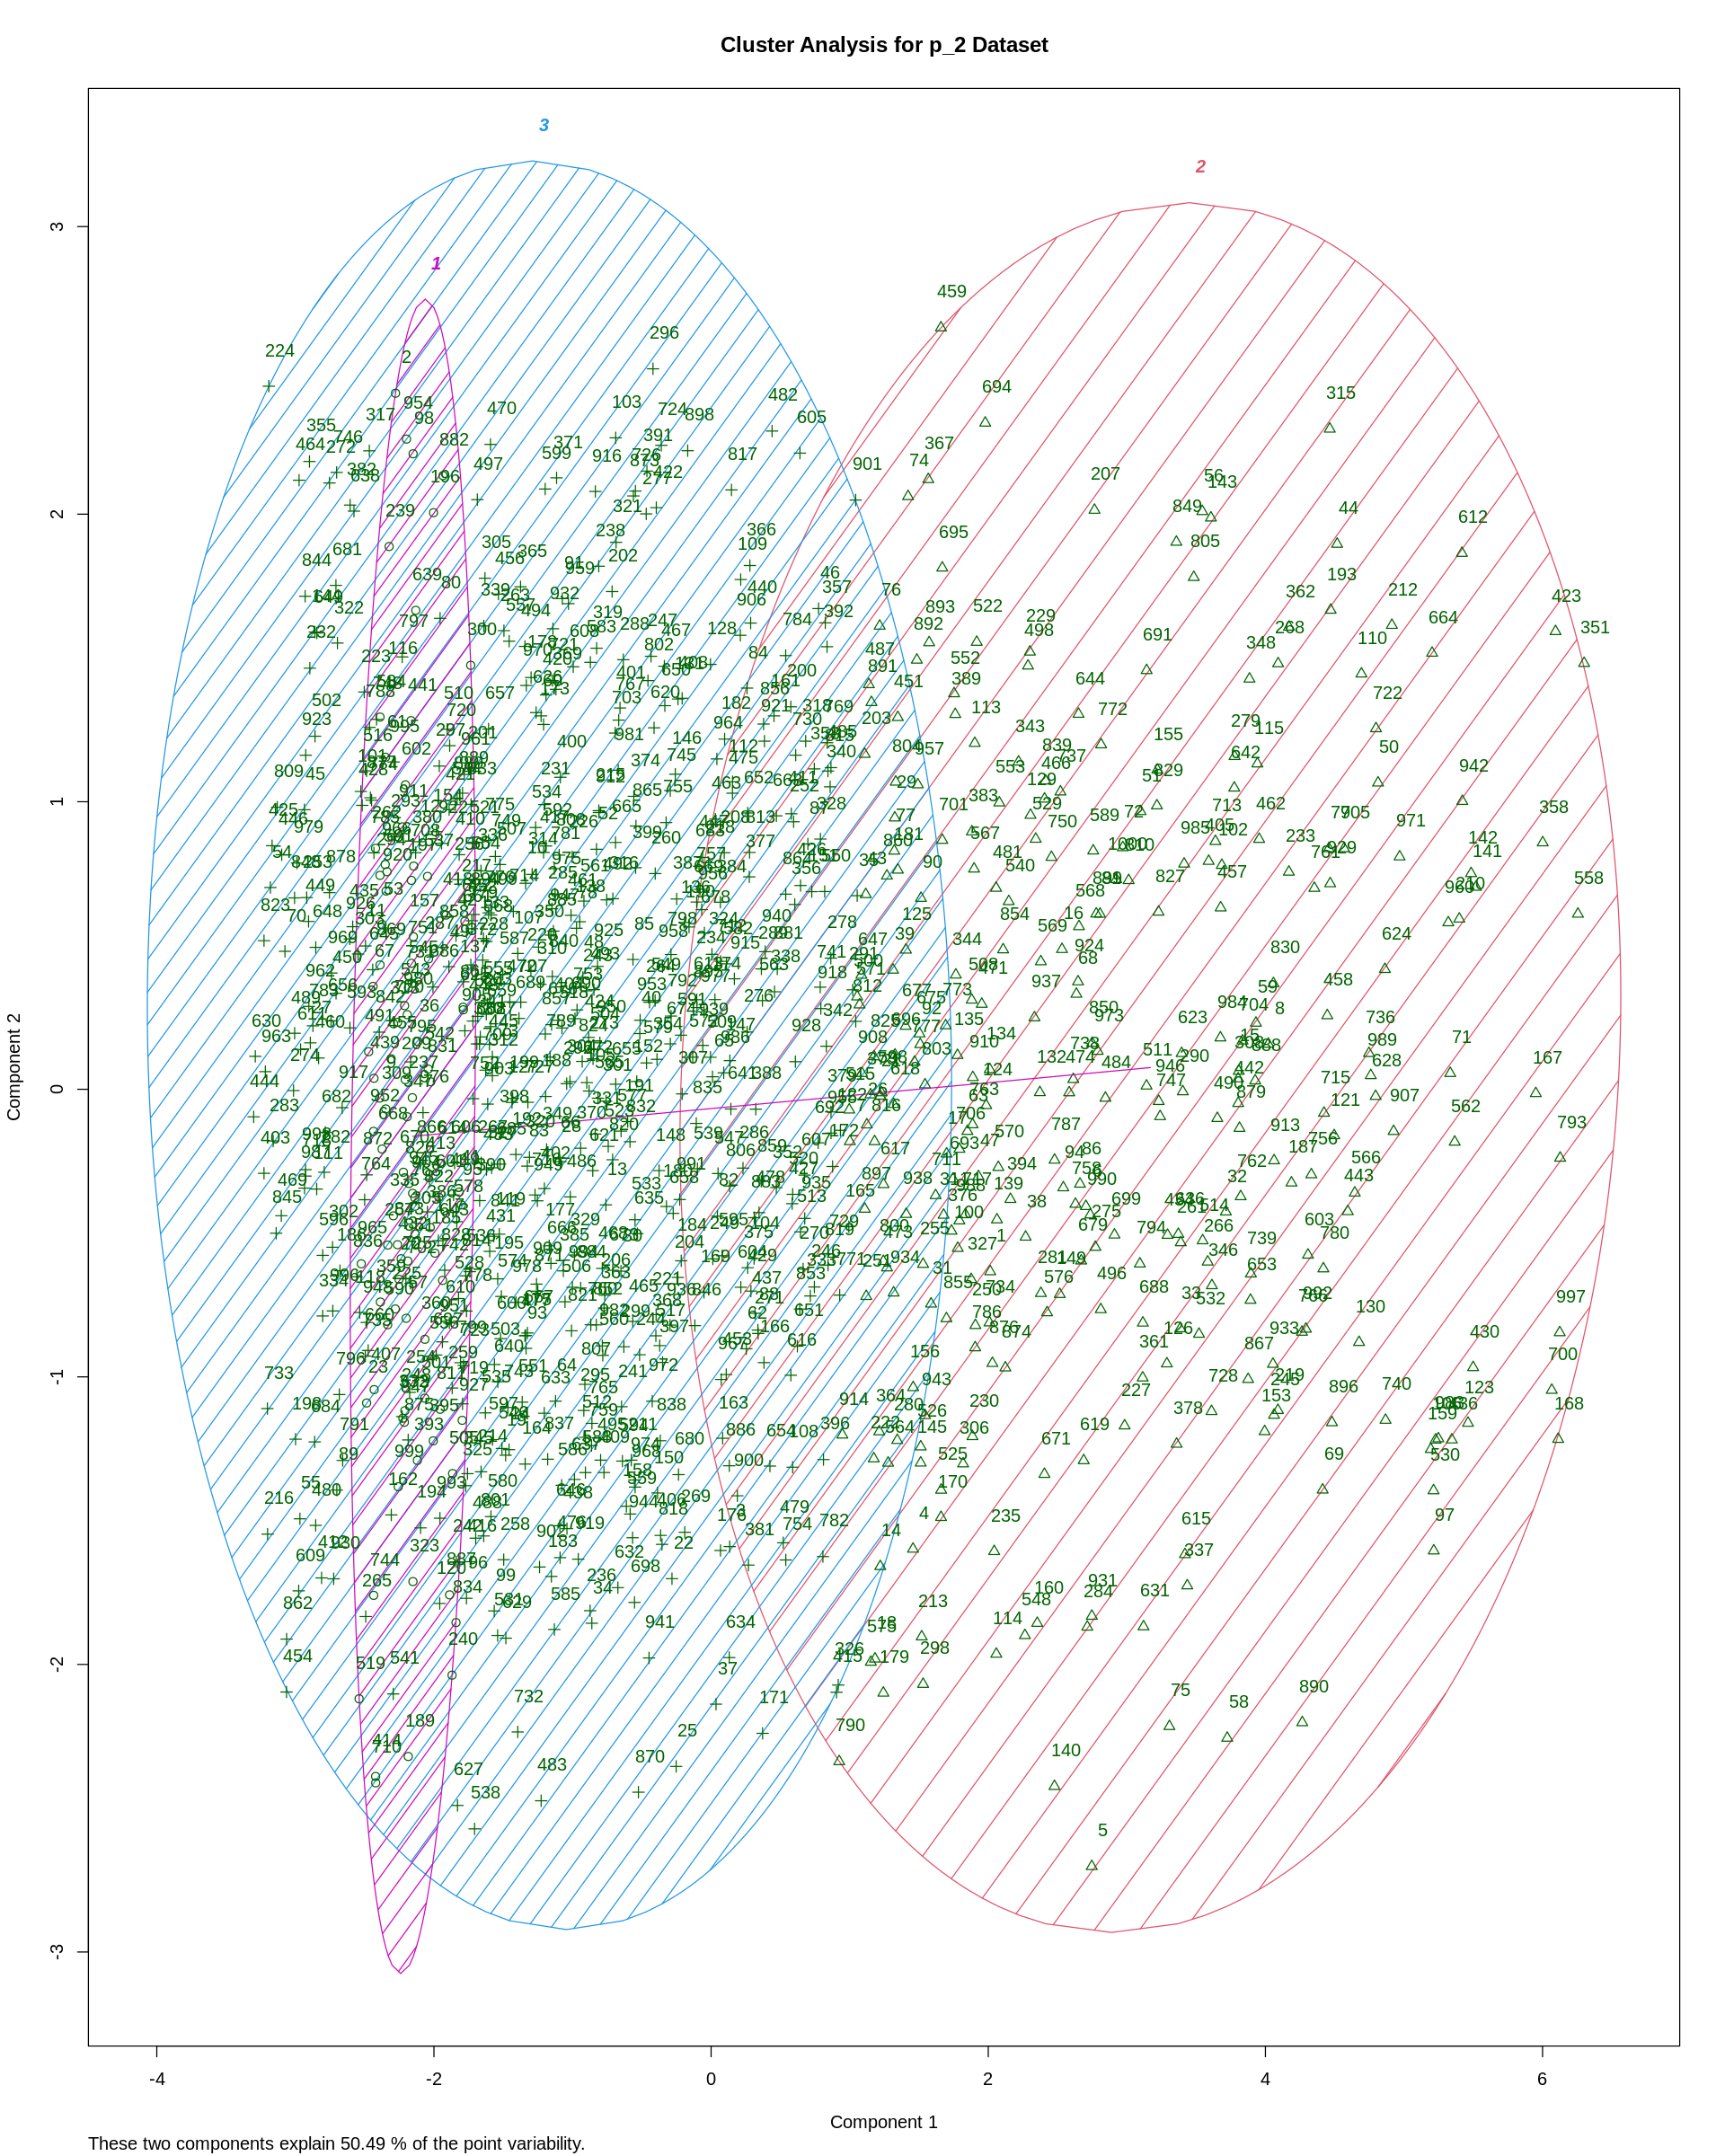

In [41]:
# Cluster Plot against 1st 2 principal components
# ---
#
clusplot(p_2[1:12], model$cluster, color=TRUE, shade=TRUE,
         labels=2, lines=1,main='Cluster Analysis for p_2 Dataset')

In [42]:
# Weights are calculated for each variable and cluster. 
# They are a measure of the relative importance of each variable 
# with regards to the membership of the observations to that cluster. 
# The weights are incorporated into the distance function, 
# typically reducing the distance for more important variables.
# Weights remain stored in the model and we can check them as follows:

round(model$weights*100,2) # 2 = decinal places

,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Payment,cogs,gross.income,Rating,Total
1,0,0.67,0.63,0,0,0,49.35,0,0,49.35,0,0
2,0,47.62,52.37,0,0,0,0.00,0,0,0.00,0,0
3,0,51.60,48.40,0,0,0,0.00,0,0,0.00,0,0


## Feature Ranking

In [43]:
# We will use the FSelector Package. This is a package containing functions for selecting attributes from a given dataset. 

# We install and load the required packages

suppressWarnings(
        suppressMessages(if
                         (!require(FSelector, quietly=TRUE))
                install.packages("FSelector")))
library(FSelector)

In [44]:
# Loading our dataset 

str(p_2)
head(p_2)

'data.frame':	1000 obs. of  12 variables:
 $ Branch       : int  1 3 1 1 1 3 1 3 1 2 ...
 $ Customer.type: int  1 2 2 1 2 2 1 2 1 1 ...
 $ Gender       : int  1 1 2 2 2 2 1 1 1 1 ...
 $ Product.line : int  4 1 5 4 6 1 1 5 4 3 ...
 $ Unit.price   : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity     : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax          : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Payment      : int  3 1 2 3 3 3 3 3 2 2 ...
 $ cogs         : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross.income : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Rating       : num  9.1 9.6 7.4 8.4 5.3 4.1 5.8 8 7.2 5.9 ...
 $ Total        : num  549 80.2 340.5 489 634.4 ...


,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Payment,cogs,gross.income,Rating,Total
,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,4,74.69,7,26.1415,3,522.83,26.1415,9.1,548.9715
2,3,2,1,1,15.28,5,3.8200,1,76.40,3.8200,9.6,80.2200
3,1,2,2,5,46.33,7,16.2155,2,324.31,16.2155,7.4,340.5255
4,1,1,2,4,58.22,8,23.2880,3,465.76,23.2880,8.4,489.0480
5,1,2,2,6,86.31,7,30.2085,3,604.17,30.2085,5.3,634.3785
6,3,2,2,1,85.39,7,29.8865,3,597.73,29.8865,4.1,627.6165


In [45]:
# From the FSelector package, we use the correlation coefficient as a unit of valuation. 
# This would be one of the several algorithms contained 
# in the FSelector package that can be used to rank the variables.
 
Scores <- linear.correlation(Total ~ ., p_2)
Scores

,attr_importance
,<dbl>
Branch,0.04104666
Customer.type,0.01967028
Gender,0.04945099
Product.line,0.03162072
Unit.price,0.63396209
Quantity,0.70551019
Tax,1.00000000
Payment,0.01243364
cogs,1.00000000


In [46]:
# From the output above, we observe a list containing 
# rows of variables on the left and score on the right. 
# In order to make a decision, we define a cutoff 
# i.e. suppose we want to use the top 5 representative variables, 
# through the use of the cutoff.k function included in the FSelector package. 
# Alternatively, we could define our cutoff visually 
# but in cases where there are few variables than in high dimensional datasets.
# 
# cutoff.k: The algorithms select a subset from a ranked attributes. 

Subset <- cutoff.k(Scores, 5) # top 5 representatives
as.data.frame(Subset)

Subset
<chr>
Tax
cogs
gross.income
Quantity
Unit.price


In [47]:
# We could also set cutoff as a percentage which would indicate 
# that we would want to work with the percentage of the best variables.

Subset2 <-cutoff.k.percent(Scores, 0.4)
as.data.frame(Subset2)

Subset2
<chr>
Tax
cogs
gross.income
Quantity


In [48]:
# Instead of using the scores for the correlation coefficient, 
# we can use an entropy - based approach as shown below;
 
Scores2 <- information.gain(Total ~ ., p_2)
Scores2

,attr_importance
,<dbl>
Branch,0.0000000
Customer.type,0.0000000
Gender,0.0000000
Product.line,0.0000000
Unit.price,0.3084863
Quantity,0.4211154
Tax,1.6094379
Payment,0.0000000
cogs,1.6094379


In [49]:
# Choosing Variables by cutoffSubset <- cutoff.k(Scores2, 5)

Subset3 <- cutoff.k(Scores2, 5)
as.data.frame(Subset3)

Subset3
<chr>
Tax
cogs
gross.income
Quantity
Unit.price


# Conclusion

* According to Filter methods the following columns are highly correlated
-- cogs
-- Total
-- and Tax
* From the correlation matrix an elimination of these columns makes the matrix perform better off

* According to the Wrapper method all other variables are being rejected only the following being left
--  Quantity, 
-- Branch
* Hence the two formed a cluster table of
-- 340 
-- 660 
* respective observations

* According to the Embedded method from the three clusters formed the following are the drawn conclusions
-- cluster: 1, 2, 3
-- totss: 116174404.814609
-- withinss : 90992.038002531, 14571332.8190073, 14754890.7064205
-- tot.withinss: 29417215.5634304
-- betweenss 86757189.2511784
-- size: 97294609
-- iterations: 20
-- total.iterations: 21
-- restarts: 0

* According to the Feature ranking method the top 5 variables are Tax, cogs, gross.income, Quantity and Unit.price